<a href="https://colab.research.google.com/github/yulya11/pandas_practice/blob/main/Methods_of_statistical_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt

import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
data = open('Москва_2021.txt', 'r')
data_text = data.read()
data = sorted(data_text.split("\n"))

# ЛР №1. Случайные величины и их характеристики

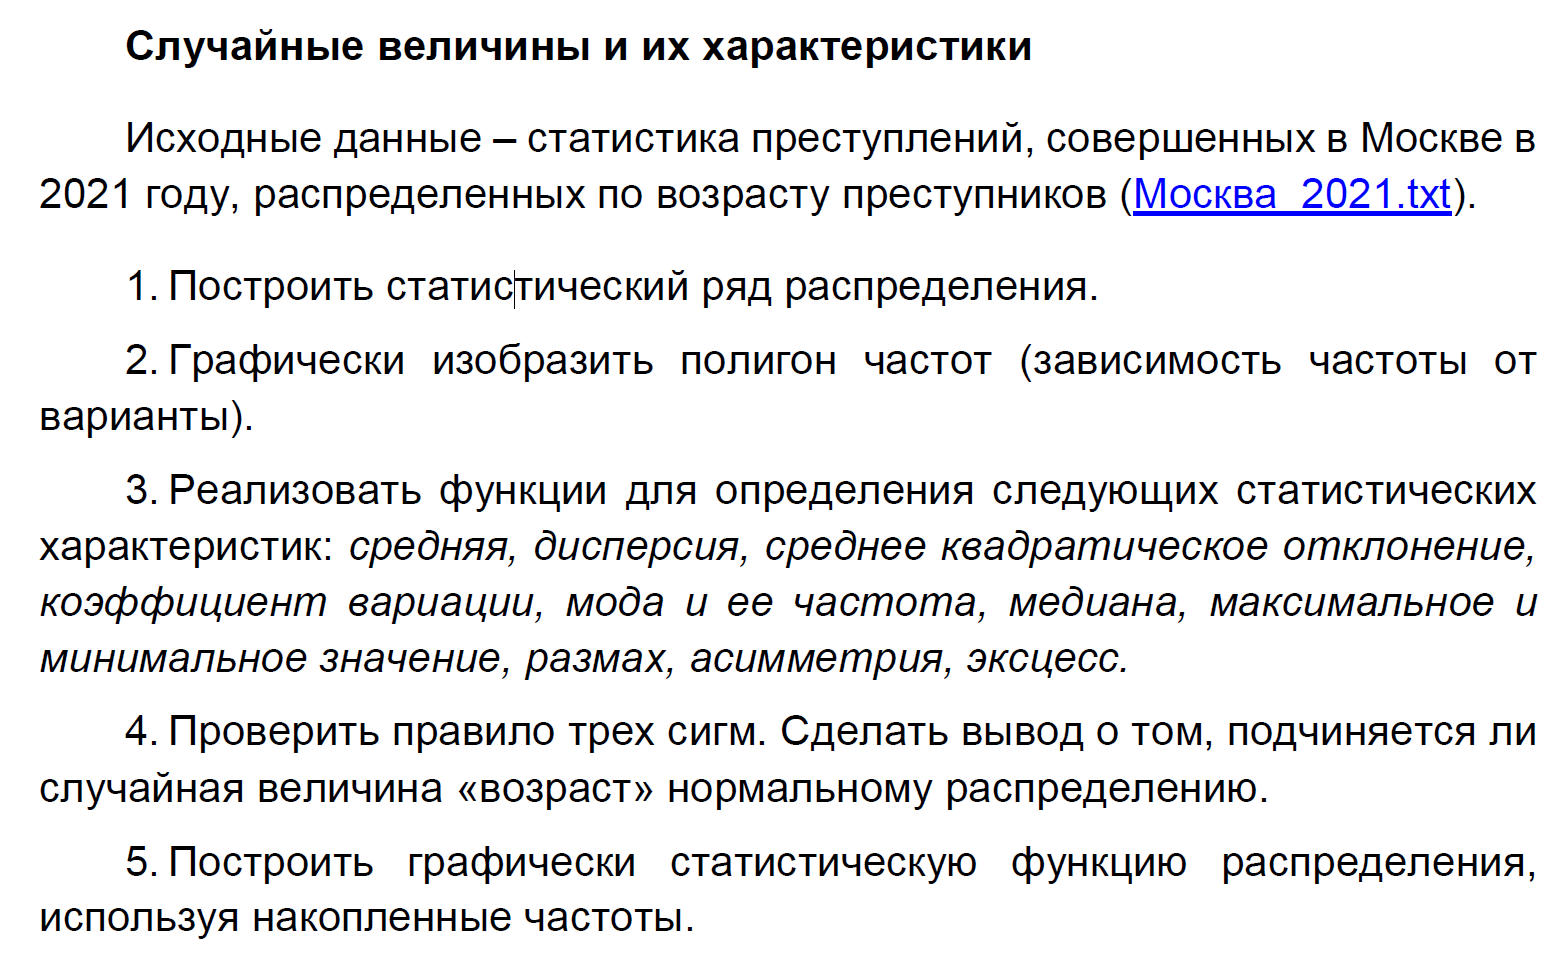

## Статистический ряд распределения и полигон частот

In [3]:
stat_ryad = {}
for i in data:
  if int(i) not in stat_ryad:
    stat_ryad[int(i)] = 1
  else:
    stat_ryad[int(i)]+=1
print(stat_ryad)

{14: 49, 15: 53, 16: 236, 17: 126, 18: 806, 19: 971, 20: 910, 21: 716, 22: 944, 23: 1071, 24: 810, 25: 1050, 26: 980, 27: 1263, 28: 1113, 29: 1340, 30: 734, 31: 1115, 32: 796, 33: 758, 34: 869, 35: 676, 36: 1198, 37: 522, 38: 1006, 39: 695, 40: 723, 41: 837, 42: 978, 43: 820, 44: 1032, 45: 690, 46: 677, 47: 831, 48: 1026, 49: 1060, 50: 150, 51: 188, 52: 193, 53: 47, 54: 26, 55: 62, 56: 76, 57: 136, 58: 262, 59: 74, 60: 266, 61: 226, 62: 139, 63: 183, 64: 189, 65: 79, 66: 188, 67: 128, 69: 202, 70: 26, 71: 85, 73: 17}


In [4]:
otnos_chast = {}
for i in stat_ryad:
  otnos_chast[i]=stat_ryad[i]/len(stat_ryad)

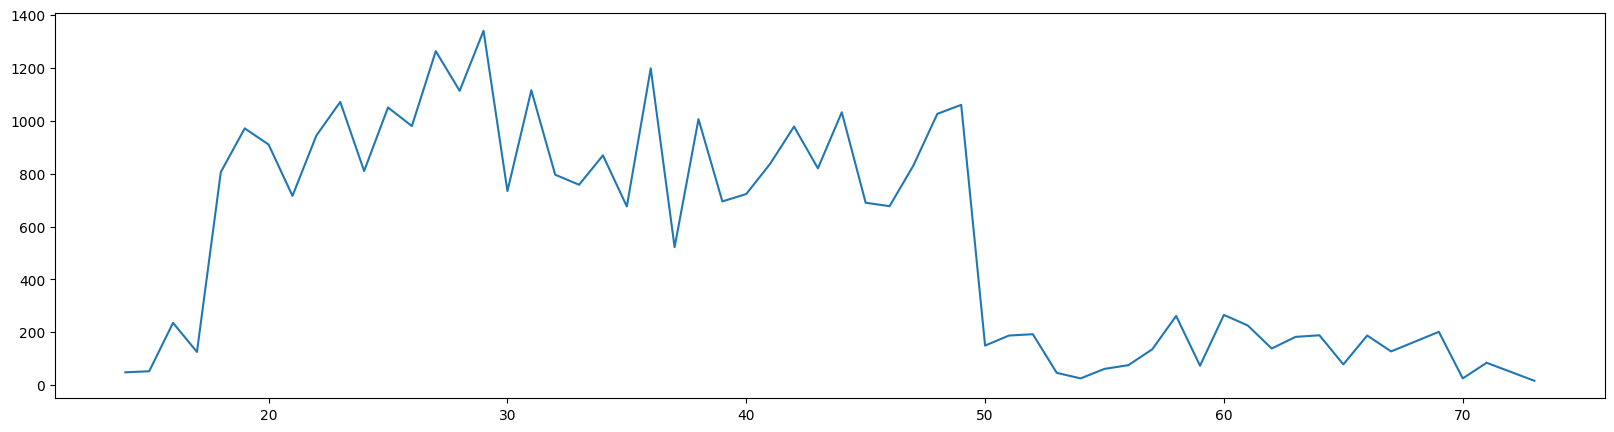

In [5]:
plt.figure(figsize=(20,5))
plt.plot(otnos_chast.keys(), stat_ryad.values())
plt.show()

## Статистические характеристики

In [6]:
n = len(data)

In [7]:
data = [int(i) for i in data]
average = sum(data)/n
print('Среднее:',average)
#.mean()

Среднее: 35.37300681614903


In [8]:
dispersion = sum([(i - average)**2 for i in data])/ n
print("Дисперсия:",dispersion)
#.var(ddof=0)

Дисперсия: 144.91696806481605


In [9]:
stand_dev = dispersion**0.5
print("Среднее квадратичное отклонение:",stand_dev)
#.std(ddof=0)

Среднее квадратичное отклонение: 12.038146371631143


In [10]:
coef_of_var = stand_dev / average * 100
print("Коэффициент вариации",coef_of_var)
#.covarience()

Коэффициент вариации 34.03201326423657


In [11]:
chast = max(stat_ryad.values())
for i in stat_ryad:
  if stat_ryad[i]==chast:
    print("Мода:", i,"Частота:", stat_ryad[i])

#.mode()

Мода: 29 Частота: 1340


In [12]:
print("Медиана:",data[n//2] if n%2!=0 else (data[n//2]+data[n//2+1])/2)

Медиана: 34


In [13]:
print("Max:", max(data), "Min:", min(data))

Max: 73 Min: 14


In [14]:
print("Размах:", max(data)-min(data))

Размах: 59


In [15]:
mom_3 = sum([(i - average)**3 for i in data])/ n
mom_4 = sum([(i - average)**4 for i in data])/ n

As = mom_3 / stand_dev**3
Ek = mom_4 / stand_dev**4 - 3
print("Асимметрия:", As, "Эксцесс:", Ek)

Асимметрия: 0.6225379970647472 Эксцесс: -0.060167342105650334


## Проверка на соответствие правилу трёх сигм

In [16]:
for k in range(1, 4):
  start = average - k*stand_dev
  end = average + k*stand_dev
  kol = 0
  for i in stat_ryad:
    if start<int(i)<end:
      kol += stat_ryad[i]
  print(f'Перцентиль данных, расположенный в пределах {k}σ', round(kol/n*100,3))

Перцентиль данных, расположенный в пределах 1σ 66.351
Перцентиль данных, расположенный в пределах 2σ 94.67
Перцентиль данных, расположенный в пределах 3σ 99.948


Случайная величина возраст не подчиняется закону нормального распределения

## Функция распределения случайной величины

In [17]:
d = {}
k = 0
for i in otnos_chast:
  k+=otnos_chast[i]
  d[i]=k


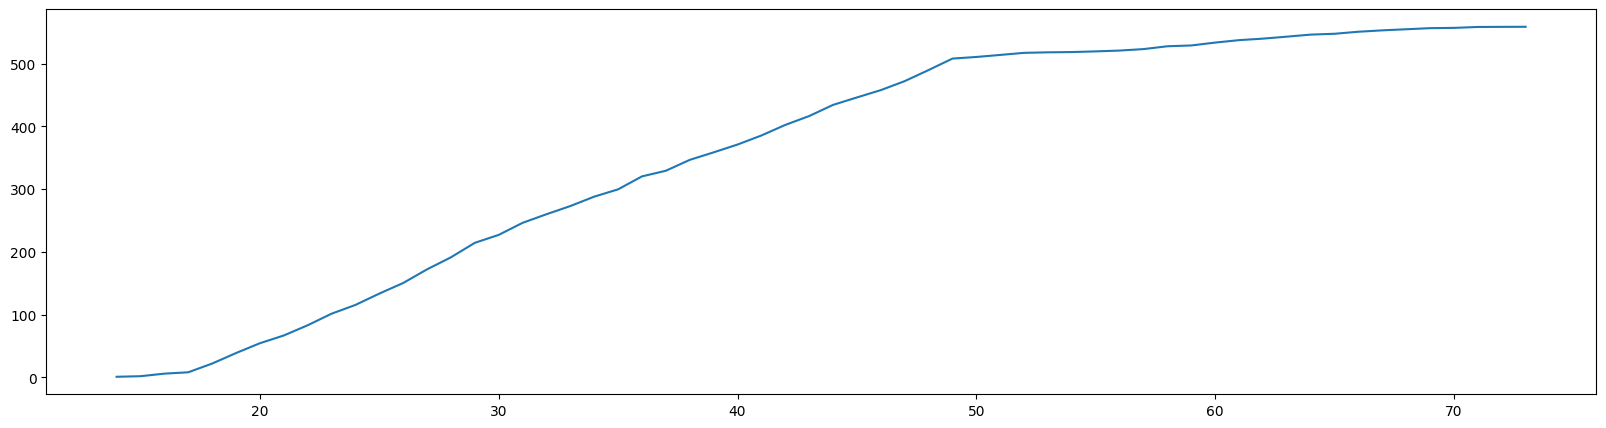

In [18]:
plt.figure(figsize=(20,5))
plt.plot(d.keys(), d.values())
plt.show()

## QQ-plot

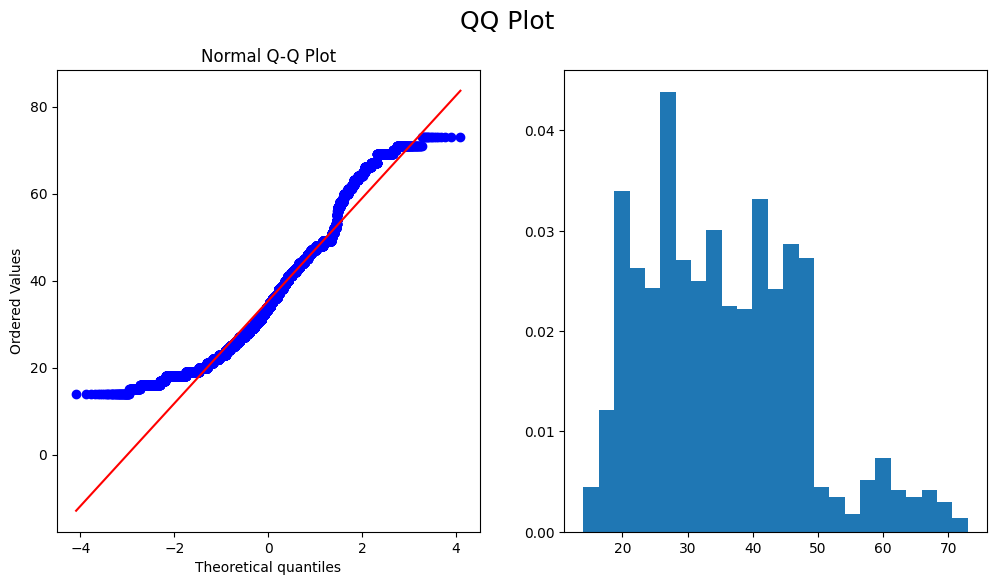

In [19]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
sps.probplot(data, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(data, 25, density=True)

plt.show()

# ЛР №2. ЦПТ. Статистические оценки

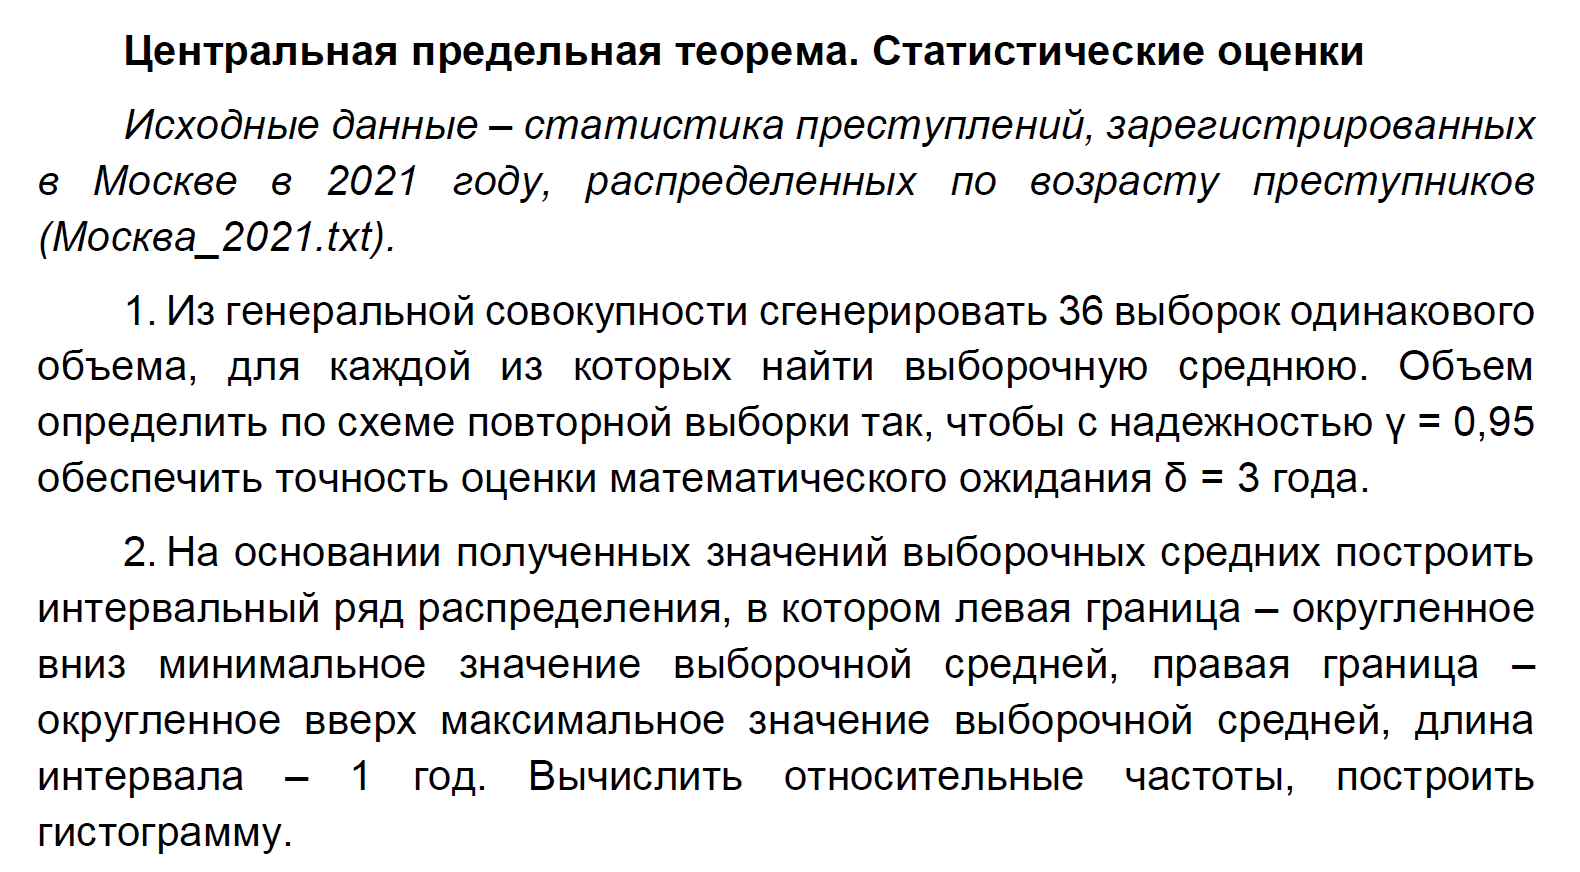

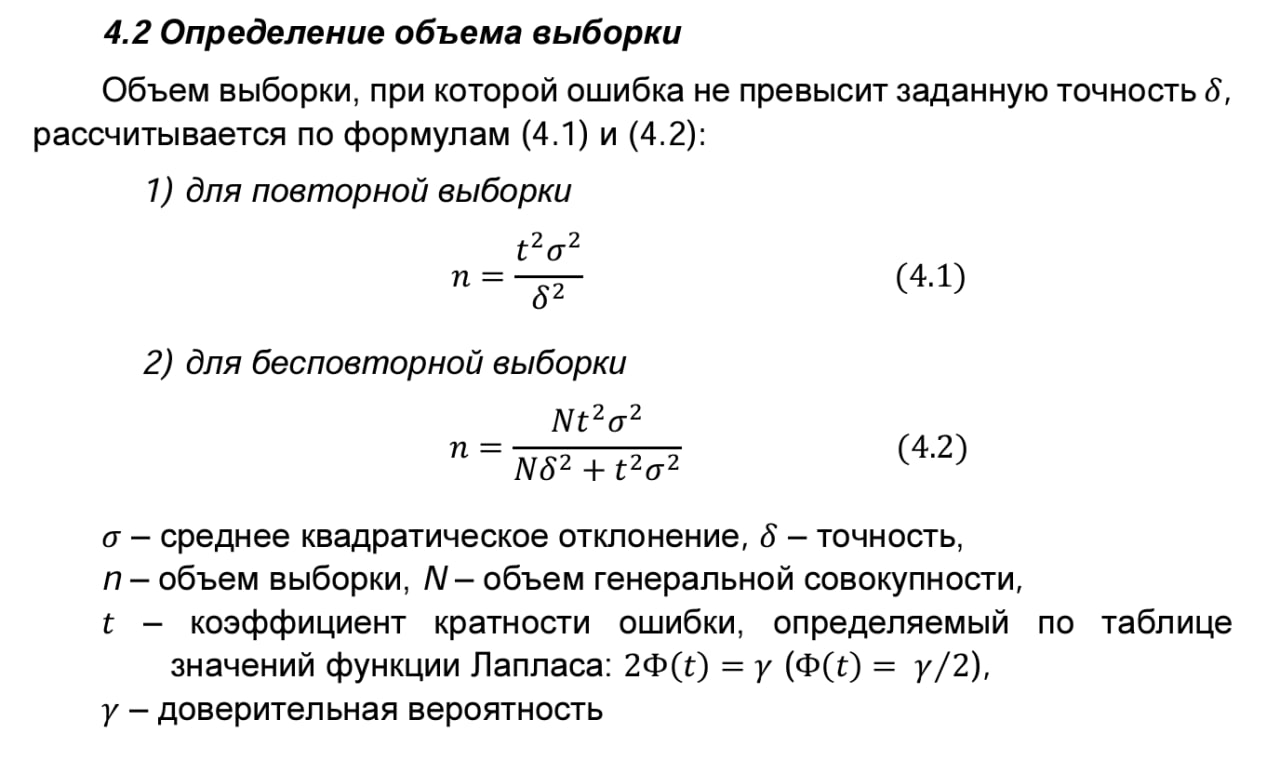

In [20]:
t = 1.96 #по таблицу при данном значении аргумента функция Лапласа равна γ/2=0.95/2=0.475
delta = 3
sample_size = t**2*dispersion/delta**2 #тк выборка с повторами

sample_size = int(sample_size)+1
sample_size

62

In [21]:
import random

In [22]:
samples = []
for _ in range(36):
  sample = random.sample(data, sample_size)
  samples.append(sample)

In [23]:
sample_means = [0]*36
for i in range(36):
  sample_means[i] = sum(samples[i])/sample_size

In [24]:
sample_means.sort()
otnos_int_ryad = {}
for i in sample_means:
  key = str(int(i))+"-"+str(int(i)+1)
  if key not in otnos_int_ryad:
    otnos_int_ryad[key] = 1
  else:
    otnos_int_ryad[key]+=1

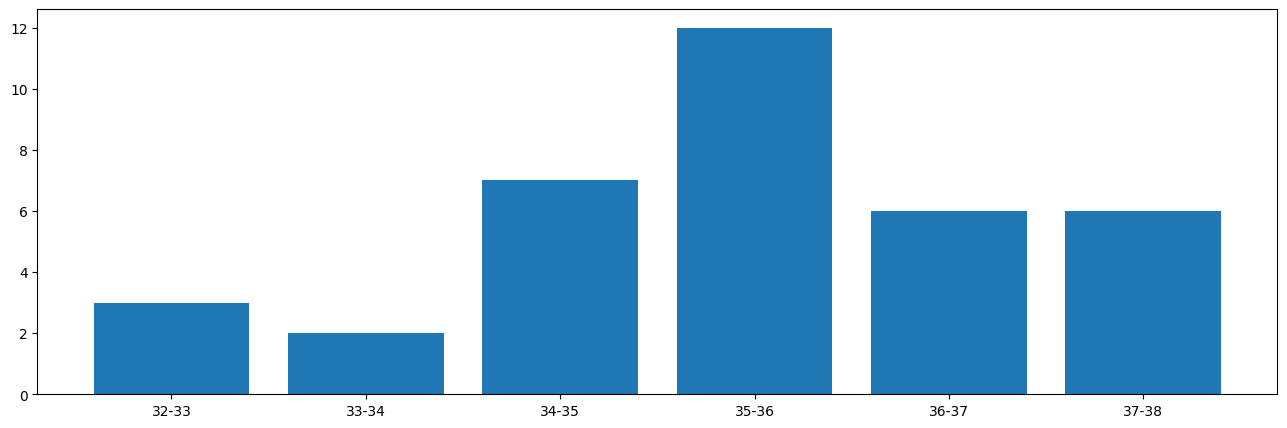

In [25]:
plt.figure(figsize=(16,5))
plt.bar(otnos_int_ryad.keys(), otnos_int_ryad.values())
plt.show()

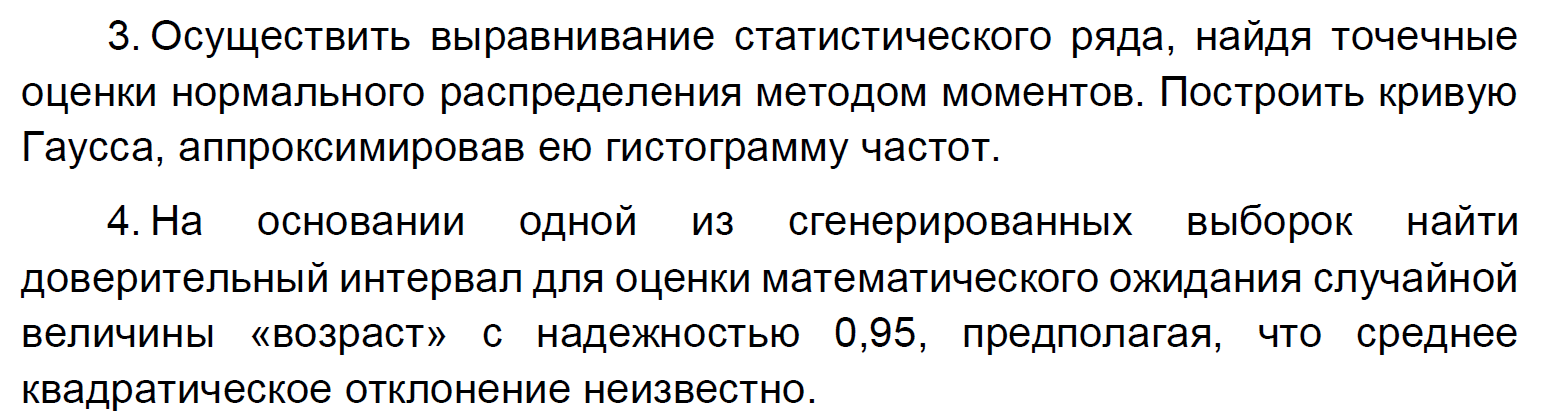

## Выравнивание статистического ряда методом моментов. Аппроксимация гистограммы частот

In [26]:
mean_x = 0
mean_x2 = 0
for i in otnos_int_ryad:
  middle = int(i.split('-')[0])+0.5
  mean_x+=(middle*otnos_int_ryad[i])
  mean_x2+=(middle**2*otnos_int_ryad[i])

mean_x/=36
mean_x2/=36

In [27]:
dispersion_means = mean_x2-mean_x**2
dispersion_means

1.99691358024711

In [28]:
sko = dispersion_means**0.5
sko

1.4131219268863922

In [29]:
from math import pi, exp

In [30]:
x = {}
for i in sample_means:
  x[i] = (1/(sko*(2*pi)**0.5))*exp(-((i-mean_x)**2)/(2*sko**2))
x

{32.29032258064516: 0.02338395471671739,
 32.41935483870968: 0.028550874784807428,
 32.983870967741936: 0.06199603781229575,
 33.41935483870968: 0.10110744486611133,
 33.54838709677419: 0.11476285554095653,
 34.25806451612903: 0.19846190505248487,
 34.33870967741935: 0.20786328552434652,
 34.435483870967744: 0.2187920296266781,
 34.66129032258065: 0.24212297825210086,
 34.82258064516129: 0.25625864953630983,
 34.854838709677416: 0.25877845255549947,
 35.03225806451613: 0.2705549730679109,
 35.064516129032256: 0.27229150453539297,
 35.16129032258065: 0.27670177792542294,
 35.32258064516129: 0.28126489769668805,
 35.5: 0.28209462347577785,
 35.693548387096776: 0.27796026887098507,
 35.88709677419355: 0.268796442488626,
 35.983870967741936: 0.26247548264586495,
 36.225806451612904: 0.2422930158809506,
 36.24193548387097: 0.2407530261856916,
 36.354838709677416: 0.2294053836324928,
 36.596774193548384: 0.20245877970336806,
 36.70967741935484: 0.18908434464733131,
 36.74193548387097: 0.1852

In [31]:
vals = {}
for i in otnos_int_ryad:
  bord = i.split('-')
  vals[int(bord[0])+0.5]=otnos_int_ryad[i]/36

vals

{32.5: 0.08333333333333333,
 33.5: 0.05555555555555555,
 34.5: 0.19444444444444445,
 35.5: 0.3333333333333333,
 36.5: 0.16666666666666666,
 37.5: 0.16666666666666666}

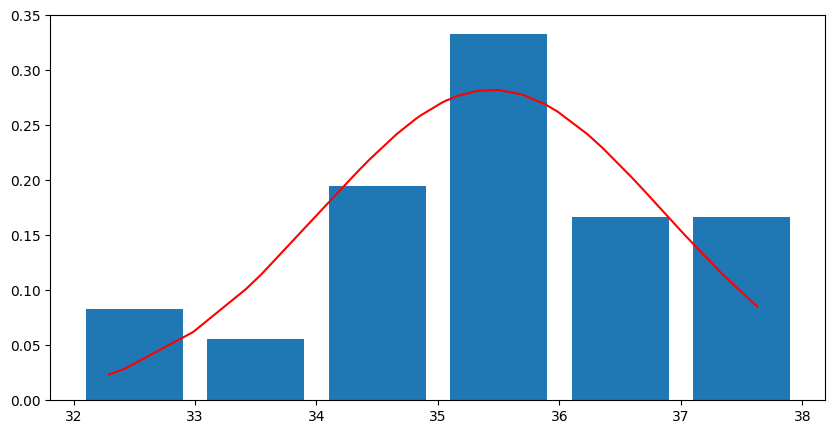

In [32]:
plt.figure(figsize=(10,5))
plt.bar(vals.keys(), vals.values())
plt.plot(x.keys(), x.values(), color = 'red')
plt.show()

## Доверительный интервал для оценки мат.ожидания

На основании одной из сгенерированных выборок найти доверительный интервал для оценки математического ожидания случайной величины «возраст» с надежностью 0,95, предполагая, что среднее квадратическое отклонение неизвестно.

In [33]:
sample = samples[0]

a_sample = sample_means[0]
s = 0
for i in sample:
  s += (i - a_sample)**2

s = (s/(sample_size-1))**0.5
t = 2 #по таблице

print(a_sample - s*t/sample_size**0.5, '< a <', a_sample + s*t/sample_size**0.5)

29.368074539456014 < a < 35.21257062183431


# ЛР №3. Проверка статистических гипотез

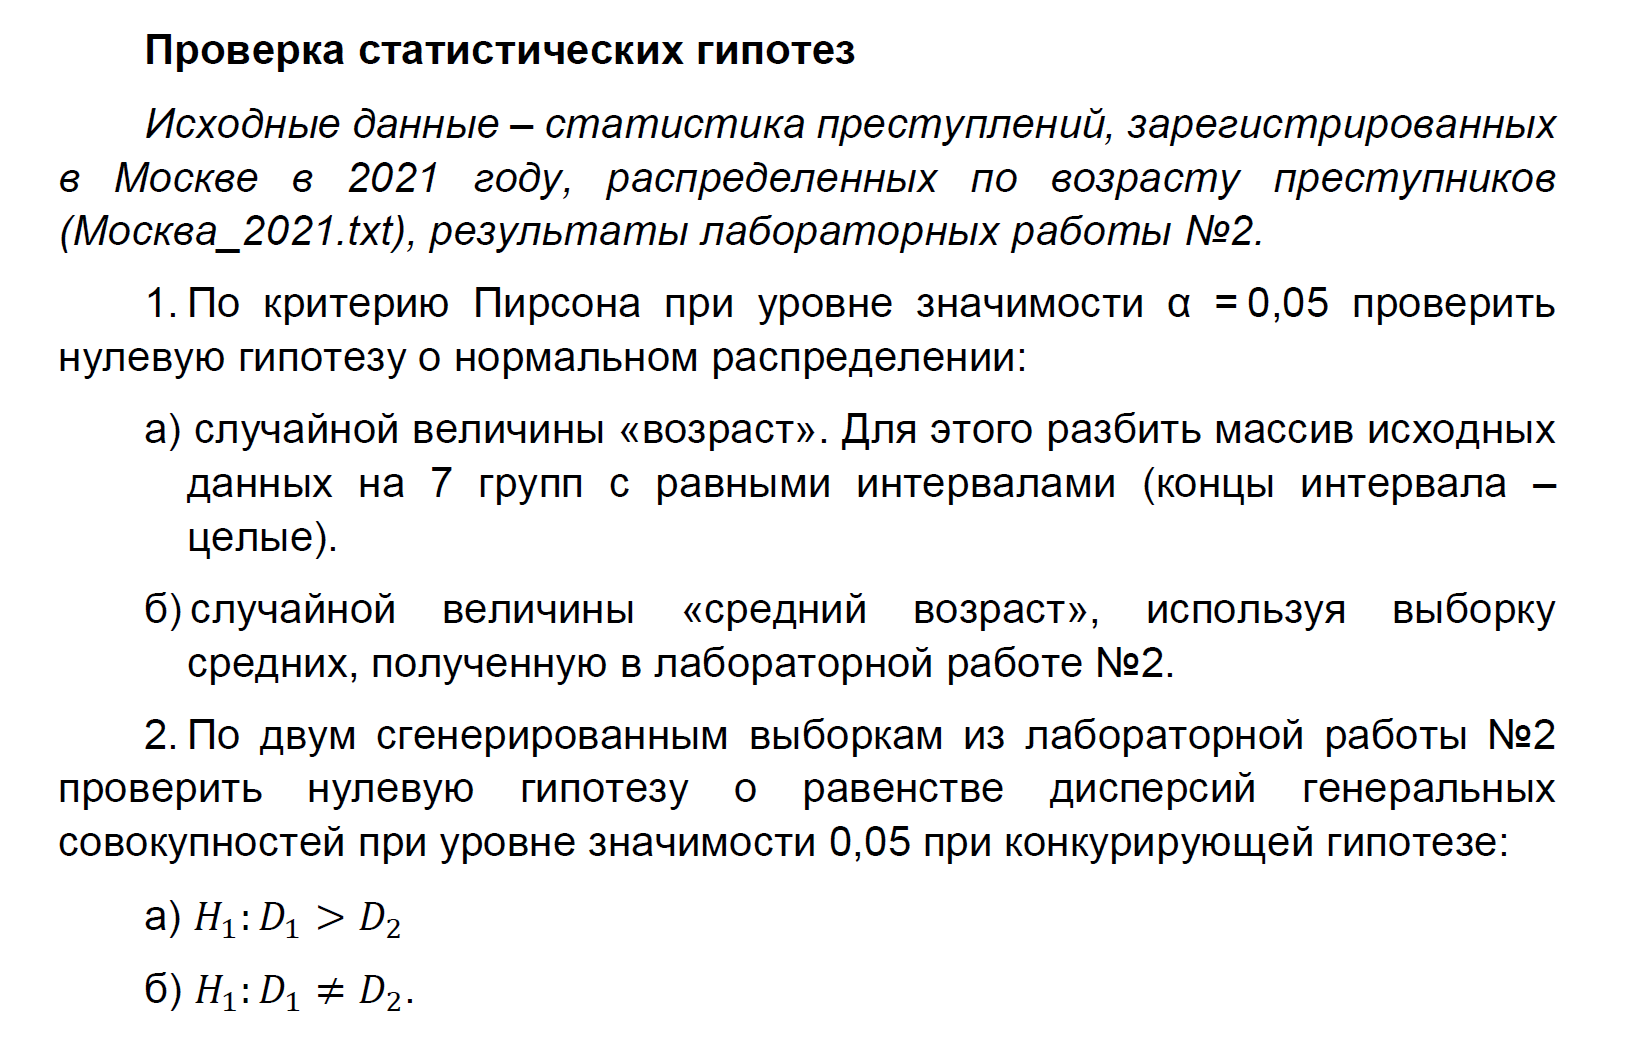

## Проверка на нормальность случайной величины "возраст"

In [34]:
interval_length = int((max(data)-min(data))/7)+1
interval_length

9

In [35]:
intervals={}
for i in range (14,73,9):
  intervals[str(i)+'-'+str(i+interval_length)]=0
intervals

{'14-23': 0,
 '23-32': 0,
 '32-41': 0,
 '41-50': 0,
 '50-59': 0,
 '59-68': 0,
 '68-77': 0}

In [36]:
for i in stat_ryad:
  for j in intervals:
    l, r = (int(number) for number in j.split('-'))
    if int(i)>=l and int(i)<r:
      intervals[j]+=stat_ryad[i]
intervals

{'14-23': 4811,
 '23-32': 9476,
 '32-41': 7243,
 '41-50': 7951,
 '50-59': 1140,
 '59-68': 1472,
 '68-77': 330}

1. Весь интервал наблюдаемых значений 𝑋 (выборки объема 𝑛) делят на 𝑠 частичных интервалов (𝑥𝑖,𝑥𝑖+1) одинаковой длины. Находят середины частичных интервалов

В качестве частоты 𝑛𝑖 варианты 𝑥𝑖∗ принимают число вариант, которые попали в i-й интервал. Получается последовательность равноотстоящих вариант и соответствующих им частот:

In [37]:
xi = {}
for i in intervals:
  l, r = (int(number) for number in i.split('-'))
  xi[(l+r)/2]=intervals[i]
xi

{18.5: 4811,
 27.5: 9476,
 36.5: 7243,
 45.5: 7951,
 54.5: 1140,
 63.5: 1472,
 72.5: 330}

2. Вычисляют выборочную среднюю 𝑥̅∗ и выборочное среднее квадратическое отклонение 𝜎∗.

In [38]:
mean_s = 0
mean_s2 = 0
for i in xi:
  mean_s += i*xi[i]
  mean_s2 += i**2*xi[i]
mean_s /= n
mean_s2 /= n
mean_s

35.630894735218824

In [39]:
s_s = sqrt(mean_s2- mean_s**2)
s_s

12.187541896935231

3. Нормируют случайную величину 𝑋:

𝑍=(𝑋−𝑥̅∗)𝜎∗

и вычисляют концы интервалов (𝑧𝑖,𝑧𝑖+1):

𝑧𝑖=(𝑥𝑖−𝑥̅∗)𝜎∗,𝑧𝑖+1=(𝑥𝑖+1−𝑥̅∗)𝜎∗,

причем её наименьшее значение 𝑧1=−∞, а наибольшее 𝑧𝑠=∞

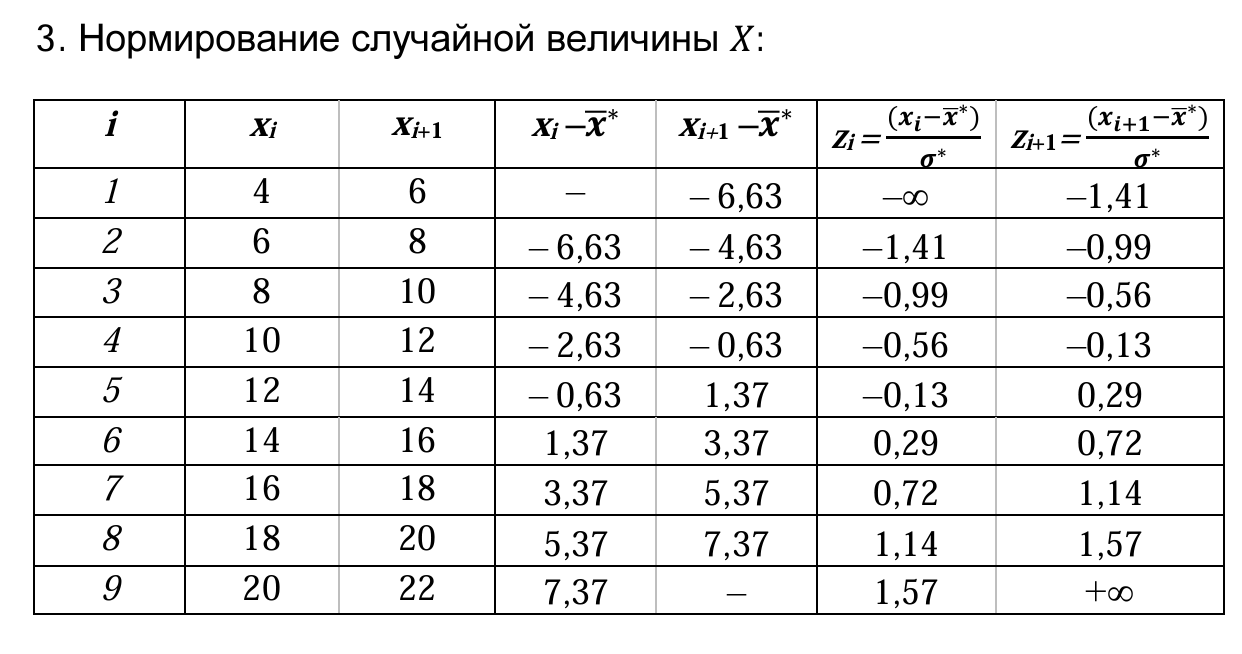

In [40]:
zi = []
for i in intervals:
  l, r = (int(number) for number in i.split('-'))
  zi.append([(l-mean_s)/s_s,(r-mean_s)/s_s])

zi[0][0]=-np.inf
zi[-1][1]=np.inf
zi

[[-inf, -1.0363775437272615],
 [-1.0363775437272615, -0.2979185438641959],
 [-0.2979185438641959, 0.44054045599886965],
 [0.44054045599886965, 1.1789994558619352],
 [1.1789994558619352, 1.9174584557250007],
 [1.9174584557250007, 2.6559174555880665],
 [2.6559174555880665, inf]]

4. Вычисляют вероятности 𝑝𝑖 попадания 𝑋 в интервалы (𝑥𝑖,𝑥𝑖+1): 𝑝𝑖=Φ(𝑧𝑖+1)−Φ(𝑧𝑖)

где Φ – функция Лапласа

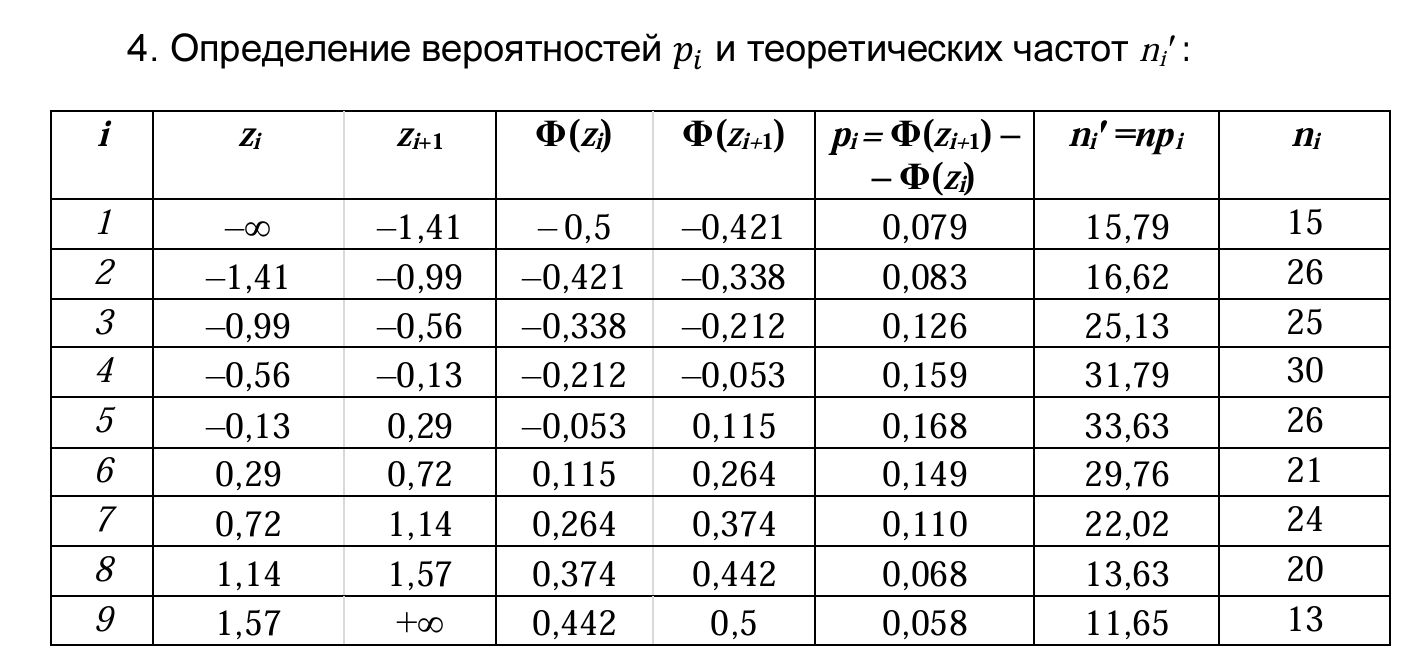

In [41]:
pi = []
for i in zi:
  print
  pi.append(sps.norm.cdf(i[1])-sps.norm.cdf(i[0]))
pi

[0.15001302130735572,
 0.2328696458425153,
 0.2873444738805245,
 0.2105736627160506,
 0.09160933924997972,
 0.023635208417131626,
 0.003954648586442566]

5. Находят искомые теоретические частоты: 𝑛𝑖′=𝑛𝑝𝑖

In [42]:
ni_= [i*n for i in pi]

ni_

[4863.872189848395,
 7550.332527151873,
 9316.569876628246,
 6827.429866242509,
 2970.2496065020923,
 766.3243625086587,
 128.22157111822733]

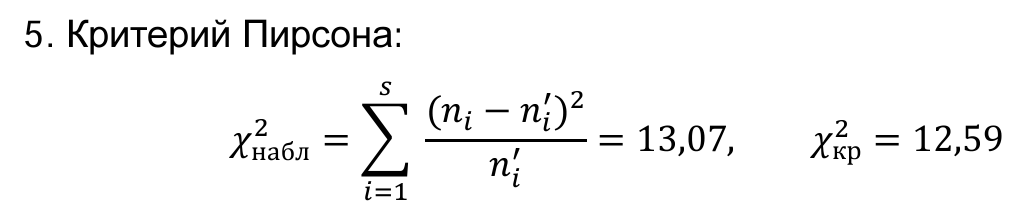

In [43]:
x2 = 0
j=0
for i in intervals:
  x2+= ((intervals[i]-ni_[j])**2/ni_[j])
  j+=1

print(f"Наблюдаемое значение хи-квадрат: {x2:.4f}")

Наблюдаемое значение хи-квадрат: 3233.2657


In [44]:
degrees_of_freedom = 4
alpha = 0.05

critical_value = sps.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Критическое значение хи-квадрат: {critical_value:.4f}")

Критическое значение хи-квадрат: 9.4877


In [45]:
if x2 > critical_value:
  print('𝜒2 набл > 𝜒2 кр => гипотеза о нормальном распределении отвергается')
else:
  print('Нет оснований отвергнуть H0')

𝜒2 набл > 𝜒2 кр => гипотеза о нормальном распределении отвергается


## Проверка на нормальность случайной величины «средний возраст»

In [46]:
otnos_int_ryad

{'32-33': 3, '33-34': 2, '34-35': 7, '35-36': 12, '36-37': 6, '37-38': 6}

In [47]:
xiav = {}
for i in otnos_int_ryad:
  l, r = (int(number) for number in i.split('-'))
  xiav[(l+r)/2]=otnos_int_ryad[i]
xiav

{32.5: 3, 33.5: 2, 34.5: 7, 35.5: 12, 36.5: 6, 37.5: 6}

In [48]:
mean_s_m = 0
mean_s2_m = 0
for i in xiav:
  mean_s_m += i*xiav[i]
  mean_s2_m += i**2*xiav[i]
mean_s_m = mean_s_m/36
mean_s2_m = mean_s2_m/36
mean_s_m

35.44444444444444

In [49]:
s_m_s = mean_s2_m-mean_s_m**2
s_m_s = s_m_s**0.5
s_m_s

1.4131219268863922

In [50]:
zi_av = []
for i in otnos_int_ryad:
  l, r = (int(number) for number in i.split('-'))
  zi_av.append([(l-mean_s_m)/s_m_s,(r-mean_s_m)/s_m_s])

zi_av[0][0]=-np.inf
zi_av[-1][1]=np.inf
zi_av

[[-inf, -1.729818494735567],
 [-1.729818494735567, -1.0221654741619255],
 [-1.0221654741619255, -0.314512453588284],
 [-0.314512453588284, 0.3931405669853575],
 [0.3931405669853575, 1.100793587558999],
 [1.100793587558999, inf]]

In [51]:
pi_av = []
for i in zi_av:
  pi_av.append(sps.norm.cdf(i[1])-sps.norm.cdf(i[0]))
pi_av

[0.04183135450090588,
 0.1115199398487575,
 0.2232146353569195,
 0.2763262386675924,
 0.21161458000108913,
 0.13549325162473558]

In [52]:
ni_av= [i*36 for i in pi_av]

ni_av

[1.5059287620326116,
 4.014717834555269,
 8.035726872849102,
 9.947744592033327,
 7.6181248800392085,
 4.877757058490481]

In [53]:
x2_av = 0
j=0
for i in otnos_int_ryad:
  x2_av+= ((otnos_int_ryad[i]-ni_av[j])**2/ni_av[j])
  j+=1
x2_av


3.6521373208138406

In [54]:
alpha = 0.05
s = len(xiav)
r = 2
k = s - 1 - r

critical_value = sps.chi2.ppf(1-alpha, k)
critical_value

7.814727903251179

In [55]:
if x2_av<critical_value:
  print('𝜒набл 2 <𝜒кр 2 => нет оснований отвергнуть H0.')
else:
  print('𝜒набл 2 >𝜒кр 2, гипотеза отвергается')

𝜒набл 2 <𝜒кр 2 => нет оснований отвергнуть H0.


## Проверка выборок на принадлежность одной ГС

In [56]:
sample1, sample2 = samples[0], samples[1]

In [57]:
a_s1 = sample_means[0]
a_s2 = sample_means[1]
s1 = 0
s2 = 0
for i in sample1:
  s1 += (i - a_s1)**2
s1 = (s1/(sample_size-1))**0.5

for i in sample2:
  s2 += (i - a_s2)**2
s2 = (s2/(sample_size-1))**0.5

In [58]:
F = s1**2/s2**2
print(f"Наблюдаемое значение F-критерия: {F:.4f}")

Наблюдаемое значение F-критерия: 0.9342


In [59]:
alpha1 = 0.05
alpha2 = 0.025
dfn = 61
dfd = 61

critical_value_1 = sps.f.ppf(1 - alpha1, dfn, dfd)
critical_value_2 = sps.f.ppf(1 - alpha2, dfn, dfd)

print(f"Критическое значение F-критерия при уровне значимости 0.05: {critical_value_1:.4f}")
print(f"Критическое значение F-критерия при уровне значимости 0.025: {critical_value_2:.4f}")

Критическое значение F-критерия при уровне значимости 0.05: 1.5288
Критическое значение F-критерия при уровне значимости 0.025: 1.6597


In [60]:
if F<critical_value_1:
  print('Fнабл < Fкр  => нет оснований отвергнуть H0 при уровне значимости 0.05.')
else:
  print('Fнабл > Fкр, гипотеза отвергается')

Fнабл < Fкр  => нет оснований отвергнуть H0 при уровне значимости 0.05.


In [61]:
if F<critical_value_2:
  print('Fнабл < Fкр  => нет оснований отвергнуть H0 при уровне значимости 0.025.')
else:
  print('Fнабл > Fкр, гипотеза отвергается')

Fнабл < Fкр  => нет оснований отвергнуть H0 при уровне значимости 0.025.


# ЛР №4. Статистические зависимости

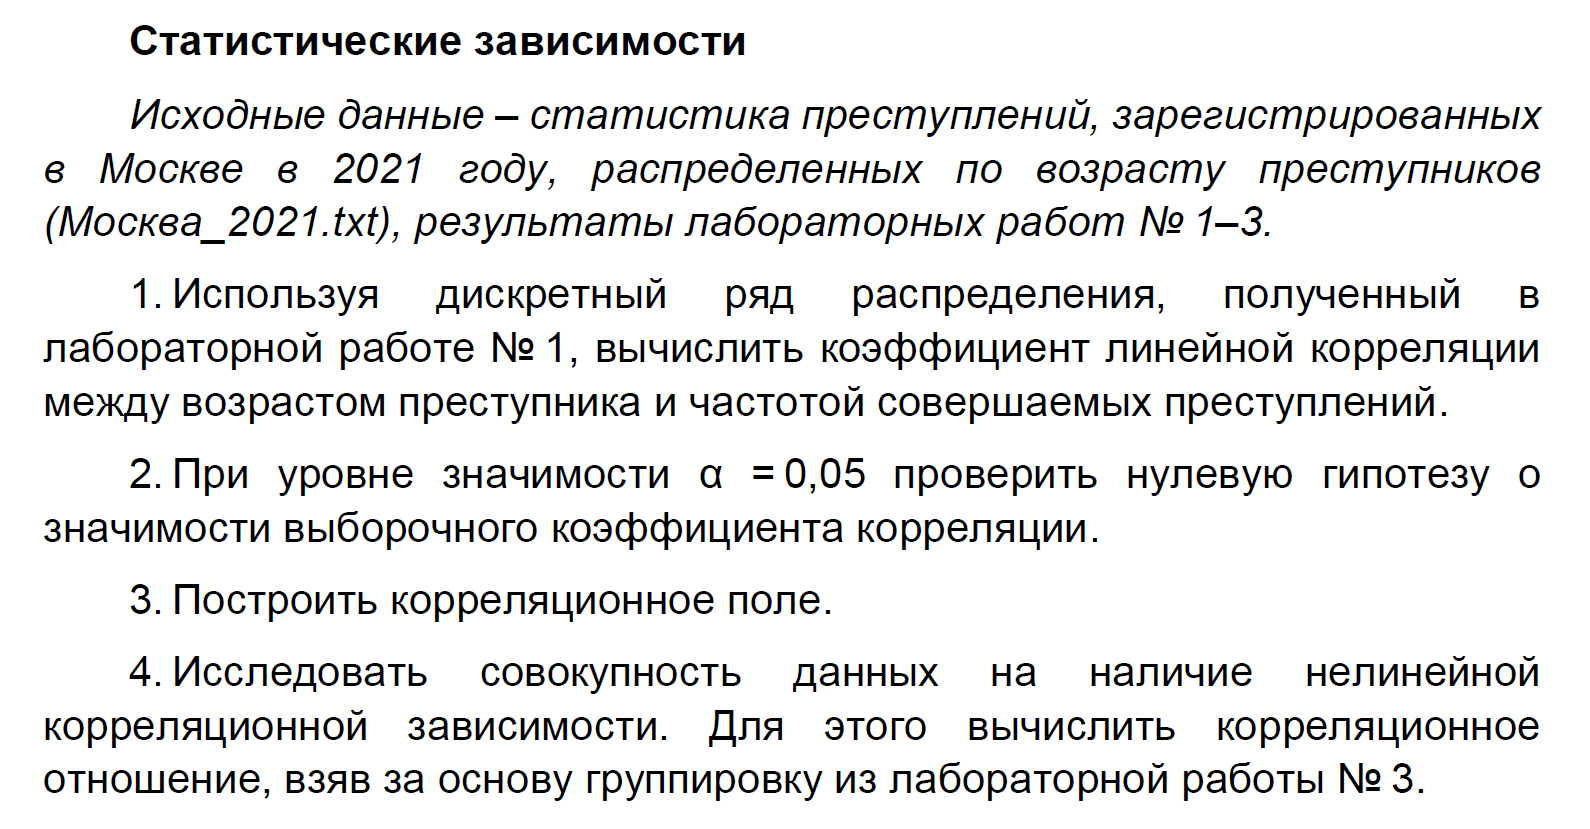

## Линейная зависимость между возрастом преступника и частотой совершаемых преступлений

In [62]:
aver_x = sum(stat_ryad.keys())/kol
aver_y = sum(stat_ryad.values())/kol
sigma_x = sqrt(sum(i**2 for i in stat_ryad.keys())/kol - aver_x**2)
sigma_y = sqrt(sum(i**2 for i in stat_ryad.values())/kol - aver_y**2)
aver_xy = sum(i*j for i,j in stat_ryad.items())/kol

print("Среднее значение x:", aver_x)
print("Среднее значение y:", aver_y)
print("Стандартное отклонение x:", sigma_x)
print("Стандартное отклонение y:", sigma_y)
print("Среднее значение произведения x и y:",aver_xy)

Среднее значение x: 0.0762204530025304
Среднее значение y: 1.0005245942109486
Стандартное отклонение x: 1.936581191146394
Стандартное отклонение y: 29.39732276357281
Среднее значение произведения x и y: 35.39156329074863


In [63]:
r_xy = (aver_xy - aver_x*aver_y)/(sigma_x*sigma_y)
print('Коэффициент корреляции x и y равен:', r_xy)

Коэффициент корреляции x и y равен: 0.6203252293611982


## Проверка гипотезы о значимости выборочного коэффициента корреляции

При 𝛼 =0,05 проверить нулевую гипотезу 𝐻0:
𝜌𝑥𝑦 = 0 при конкурирующей гипотезе 𝐻1: 𝜌𝑥𝑦 ≠ 0.

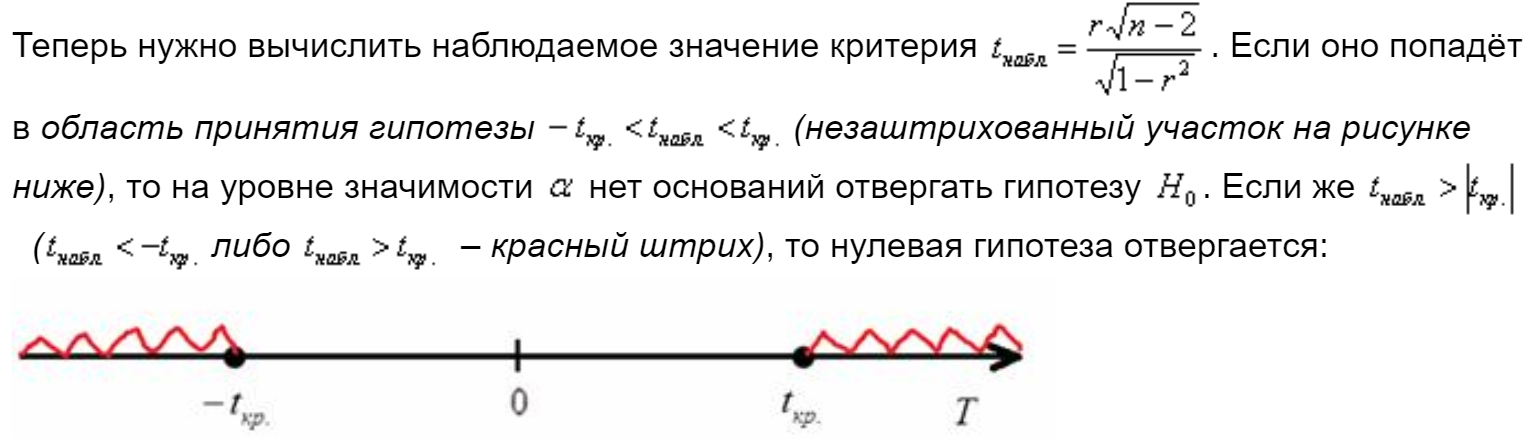

In [64]:
T_nabl = r_xy*sqrt(kol-2)/sqrt(1-r_xy**2)
print("Наблюдаемое значение:",T_nabl)

Наблюдаемое значение: 142.3678051853958


In [66]:
alpha = 0.05

t_critical = sps.t.ppf(1 - alpha / 2, df=kol - 2)

print(f"Критическое значение для двустороннего критерия: {t_critical:.4f}")

Критическое значение для двустороннего критерия: 1.9600


In [67]:
if abs(T_nabl)<t_critical:
  print("Гипотеза принимается. Величины X и Y независимы")
else:
  print("Нулевая гипотеза отвергается. Выборочный коэффициент корреляции 𝑟𝑥𝑦 значимо отличается от нуля. Это означает, что величины X и Y коррелированы. ")

Нулевая гипотеза отвергается. Выборочный коэффициент корреляции 𝑟𝑥𝑦 значимо отличается от нуля. Это означает, что величины X и Y коррелированы. 


## Корреляционное поле

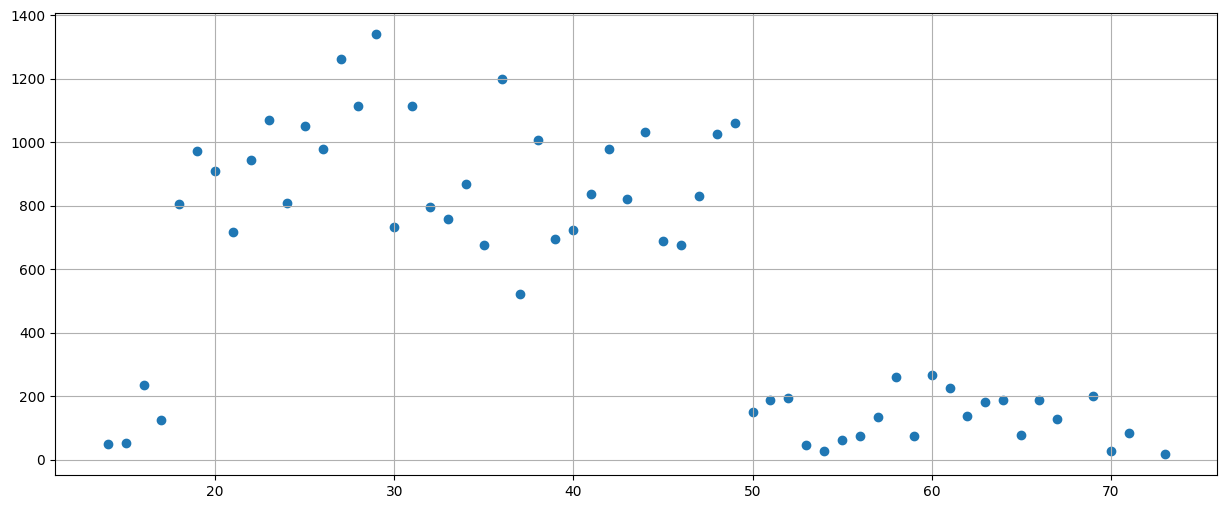

In [68]:
plt.figure(figsize=(15,6))
plt.scatter(stat_ryad.keys(), stat_ryad.values())
plt.grid(visible=True)

plt.show()


## Расчёт корреляционного отношения (нелинейная зависимость)

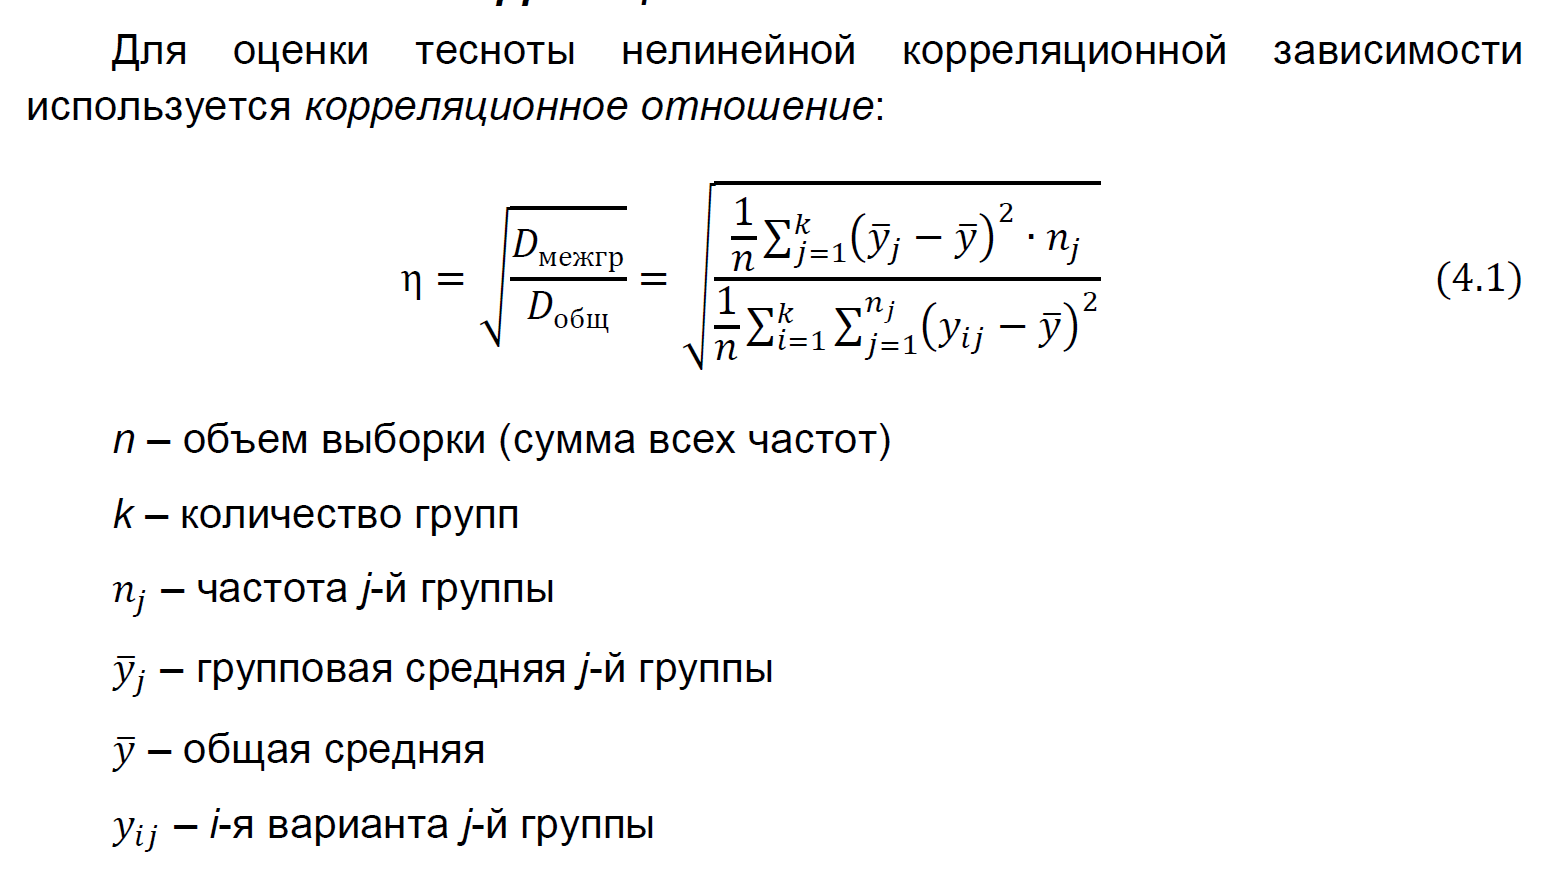

In [72]:
intervals={}
intervals_means={}
intervals_disp={}
for i in range (14,73,9):
  intervals[str(i)+'-'+str(i+9)]=0
  intervals_means[str(i)+'-'+str(i+9)]=0
  intervals_disp[str(i)+'-'+str(i+9)]=0
for i in stat_ryad:
  for j in intervals:
    l, r = (int(number) for number in j.split('-'))
    if i>=l and i<r:
      intervals[j]+=stat_ryad[i]
      intervals_means[j]+=i*stat_ryad[i]
      intervals_disp[j]+=i**2*stat_ryad[i]
print('Групповые частоты:')
intervals

Групповые частоты:


{'14-23': 4811,
 '23-32': 9476,
 '32-41': 7243,
 '41-50': 7951,
 '50-59': 1140,
 '59-68': 1472,
 '68-77': 330}

In [73]:
for i in intervals:
  intervals_means[i]/=intervals[i]
  intervals_disp[i]/=intervals[i]
print('Групповые средние:')
intervals_means

Групповые средние:


{'14-23': 19.613385990438577,
 '23-32': 27.06975517095821,
 '32-41': 35.950158773988676,
 '41-50': 45.088416551377186,
 '50-59': 54.0640350877193,
 '59-68': 62.82201086956522,
 '68-77': 69.8}

In [74]:
for i in intervals_disp:
  intervals_disp[i]=intervals_disp[i]-intervals_means[i]**2
print('Групповые дисперсии:')
intervals_disp

Групповые дисперсии:


{'14-23': 3.31883141596677,
 '23-32': 6.382322903334398,
 '32-41': 6.359382482039564,
 '41-50': 7.123486751903101,
 '50-59': 9.375724068944237,
 '59-68': 5.991417695533983,
 '68-77': 1.2933333333330665}

In [75]:
disp_vngr = 0
for i in intervals_disp:
  disp_vngr +=intervals_disp[i]*intervals[i]/n
print("Внутригрупповая дисперсия",disp_vngr)

Внутригрупповая дисперсия 6.140089829516991


In [76]:
disp_mgr = 0
for i in intervals_means:
  disp_mgr += (intervals_av[i]-average)**2*intervals[i]/n
print("Межгрупповая дисперсия",disp_mgr)

Межгрупповая дисперсия 67724770764.40614


In [77]:
disp_ob = disp_vngr+disp_mgr
print("Общая дисперсия",disp_ob)

Общая дисперсия 67724770770.546234


In [78]:
kor_otn = sqrt(disp_mgr/disp_ob)
print("Корреляционное отношение:",kor_otn)

Корреляционное отношение: 0.9999999999546688


# ЛР5. Структурная идентификация

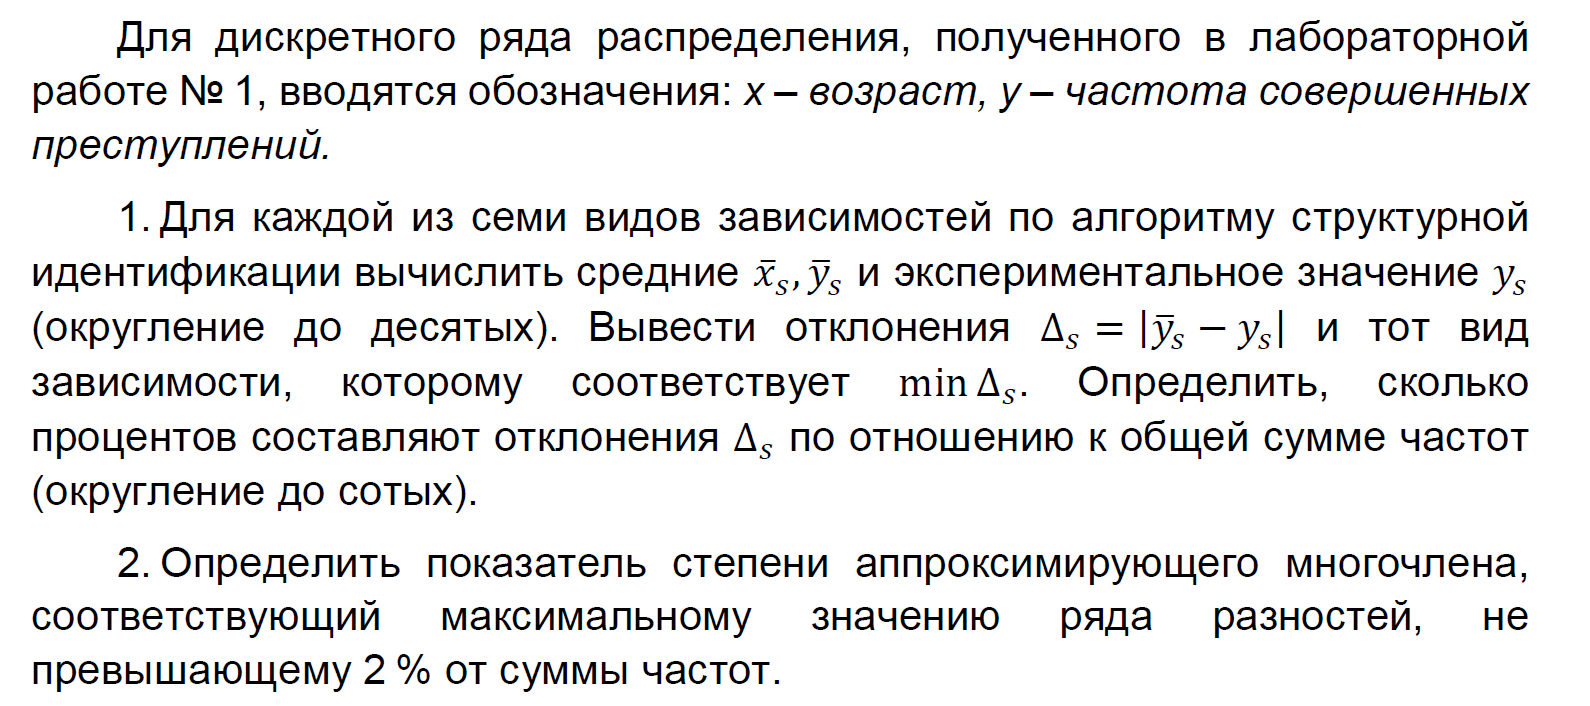

In [79]:
x = list(stat_ryad.keys())
y = list(stat_ryad.values())
print(x)
print(y)

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73]
[49, 53, 236, 126, 806, 971, 910, 716, 944, 1071, 810, 1050, 980, 1263, 1113, 1340, 734, 1115, 796, 758, 869, 676, 1198, 522, 1006, 695, 723, 837, 978, 820, 1032, 690, 677, 831, 1026, 1060, 150, 188, 193, 47, 26, 62, 76, 136, 262, 74, 266, 226, 139, 183, 189, 79, 188, 128, 202, 26, 85, 17]


## Определение вида зависимости

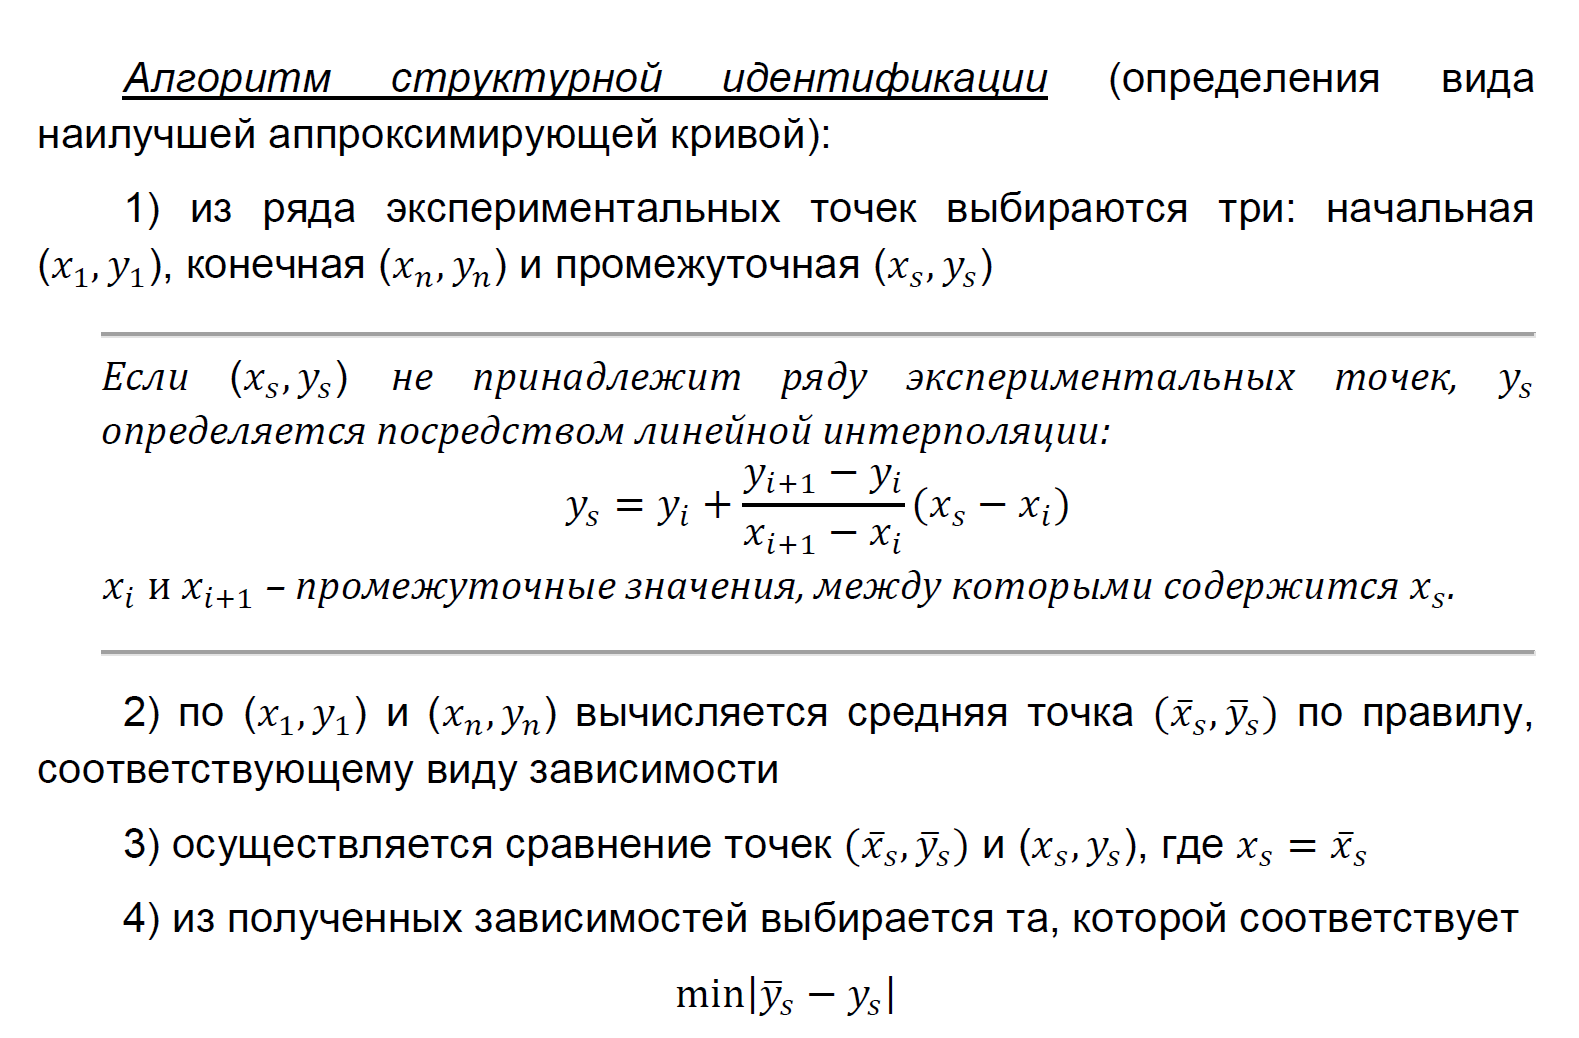

In [80]:
x1, y1, xn, yn = x[0], y[0], x[-1], y[-1]

print("x1 и хn:", x1, xn)
print("y1 и yn:", y1, yn)

xs = [(x1+xn)/2, (x1*xn)**0.5, (2*x1*xn)/(x1+xn)]
ys = [(y1+yn)/2, (y1*yn)**0.5, (2*y1*yn)/(y1+yn)]
for i in range(3):
  xs[i]=round(xs[i],1)
  ys[i]=round(ys[i],1)
i_s = []
for i in xs:
  if i not in x:
    for j in range(len(x)):
      if i>x[j] and i<x[j+1]:
        i_s.append(j)
        break
  else:
    i_s.append(x.index(i))

ys_s = []
f = 0
for i in i_s:
  ys_s.append(round(y[i] + (y[i+1]-y[i])/(x[i+1]-x[i])*(xs[f]-x[i]),2))
  f+=1
print(*xs)
print(*ys)
print(*ys_s)

x1 и хn: 14 73
y1 и yn: 49 17
43.5 32.0 23.5
33.0 28.9 25.2
926.0 796.0 940.5


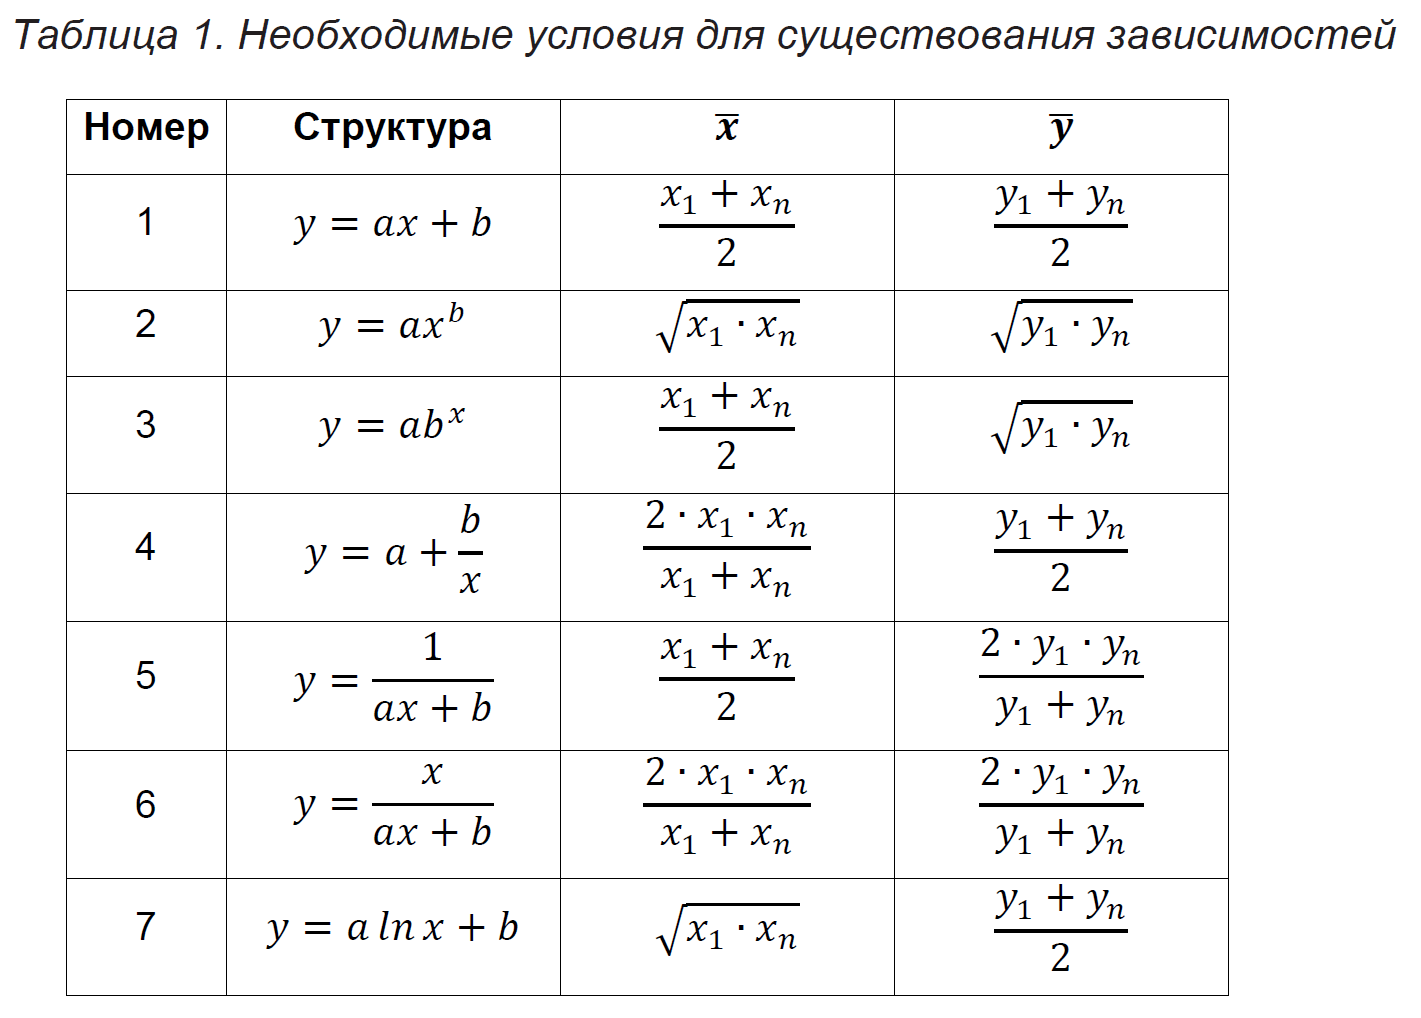

In [81]:
fs = [[xs[0], ys[0], ys_s[0], 0, 0],
      [xs[1], ys[1], ys_s[1], 0, 0],
      [xs[0], ys[1], ys_s[0], 0, 0],
      [xs[2], ys[0], ys_s[2], 0, 0],
      [xs[0], ys[2], ys_s[0], 0, 0],
      [xs[2], ys[2], ys_s[2], 0, 0],
      [xs[1], ys[0], ys_s[1], 0, 0]]

for i in fs:
  i[3] = abs(i[2]-i[1])
  i[4] = round(i[3]/sum(y)*100,2)

print(fs)
min_ds = 100
ind = []
for i in fs:
  if i[4]<min_ds:
    min_ds = i[4]
    ind = i
print(min_ds)
print(ind, "функция: a*ln(x) + b")


[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 940.5, 907.5, 2.8], [43.5, 25.2, 926.0, 900.8, 2.78], [23.5, 25.2, 940.5, 915.3, 2.82], [32.0, 33.0, 796.0, 763.0, 2.35]]
2.35
[32.0, 33.0, 796.0, 763.0, 2.35] функция: a*ln(x) + b


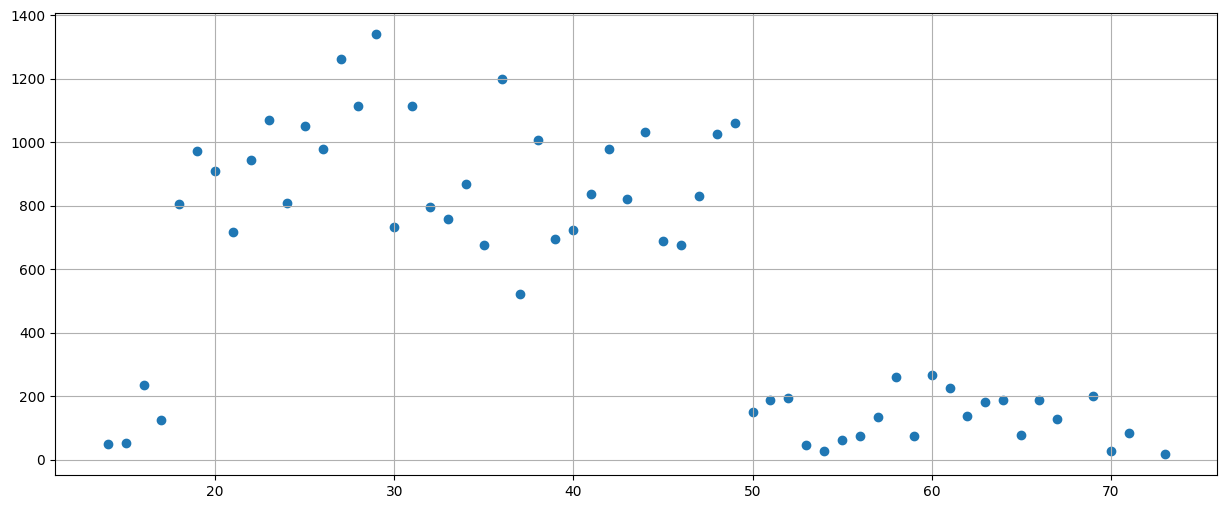

In [82]:
plt.figure(figsize=(15,6))
plt.scatter(x, y)
plt.grid(visible=True)

plt.show()

## Определение показателя степени аппроксимирующего многочлена

In [83]:
x_extra = []
for i in range (x[0],x[-1]+1):
  if i not in x:
    x_extra.append(i)

In [84]:
y_extra = []
for i in x_extra:
  y_extra.append(round(y[x.index(i-1)] + (y[x.index(i-1)]-y[x.index(i-1)])/(i+1-(i-1))*(xs[0]-(i-1)),2))

print(x_extra)
print(y_extra)

[68, 72]
[128.0, 85.0]


In [85]:
x.insert(x.index(x_extra[0]-1)+1, x_extra[0])
x.insert(x.index(x_extra[1]-1)+1, x_extra[1])

y.insert(x.index(x_extra[0]), y_extra[0])
y.insert(x.index(x_extra[1]), y_extra[1])


In [86]:
dy1 = []
for i in range(1,len(y)):
  dy1.append(abs(y[i]- y[i-1]))
max(dy1)/sum(y)*100

2.7883319034195364

In [87]:
k = max(dy1)/sum(y)*100
nk=1
while k>2:
  dyy = []
  for i in range(1,len(dy1)):
    dyy.append(abs(dy1[i]- dy1[i-1]))
  dy1 = dyy.copy()
  nk +=1
  k = max(dy1)/sum(y)*100
nk

5

Значит, показатель степени аппроксимирующего многочлена, соответствующий максимальному значению ряда разностей, не превышающему 2% от суммы частот - 5

# ЛР6. Параметрическая идентификация

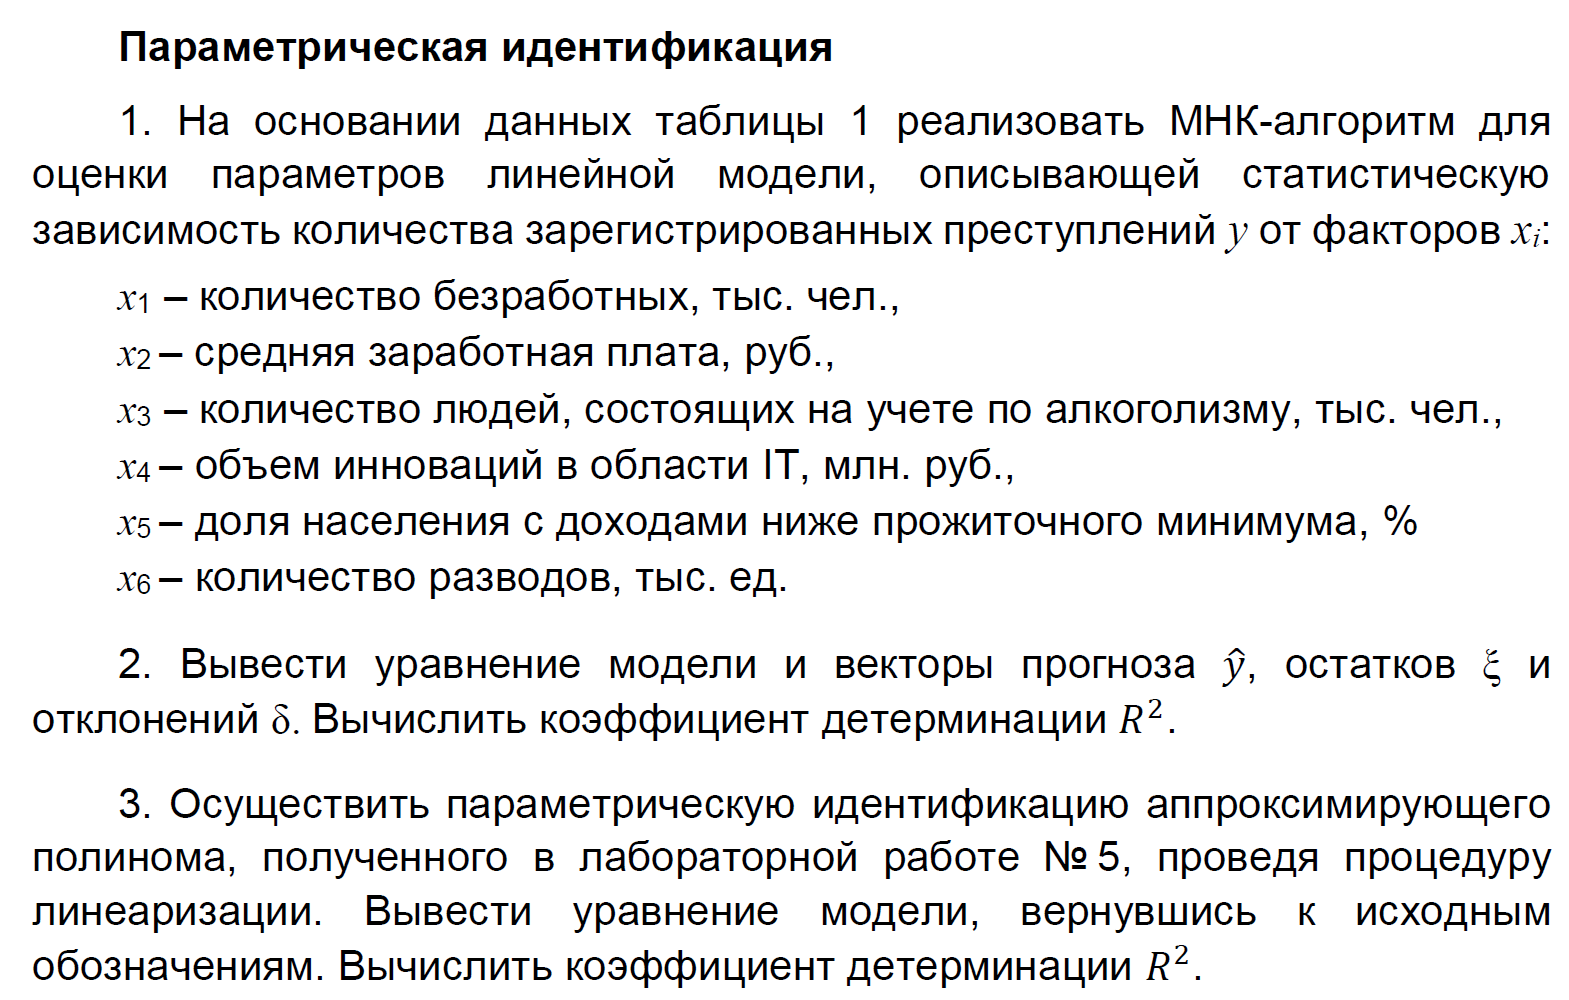

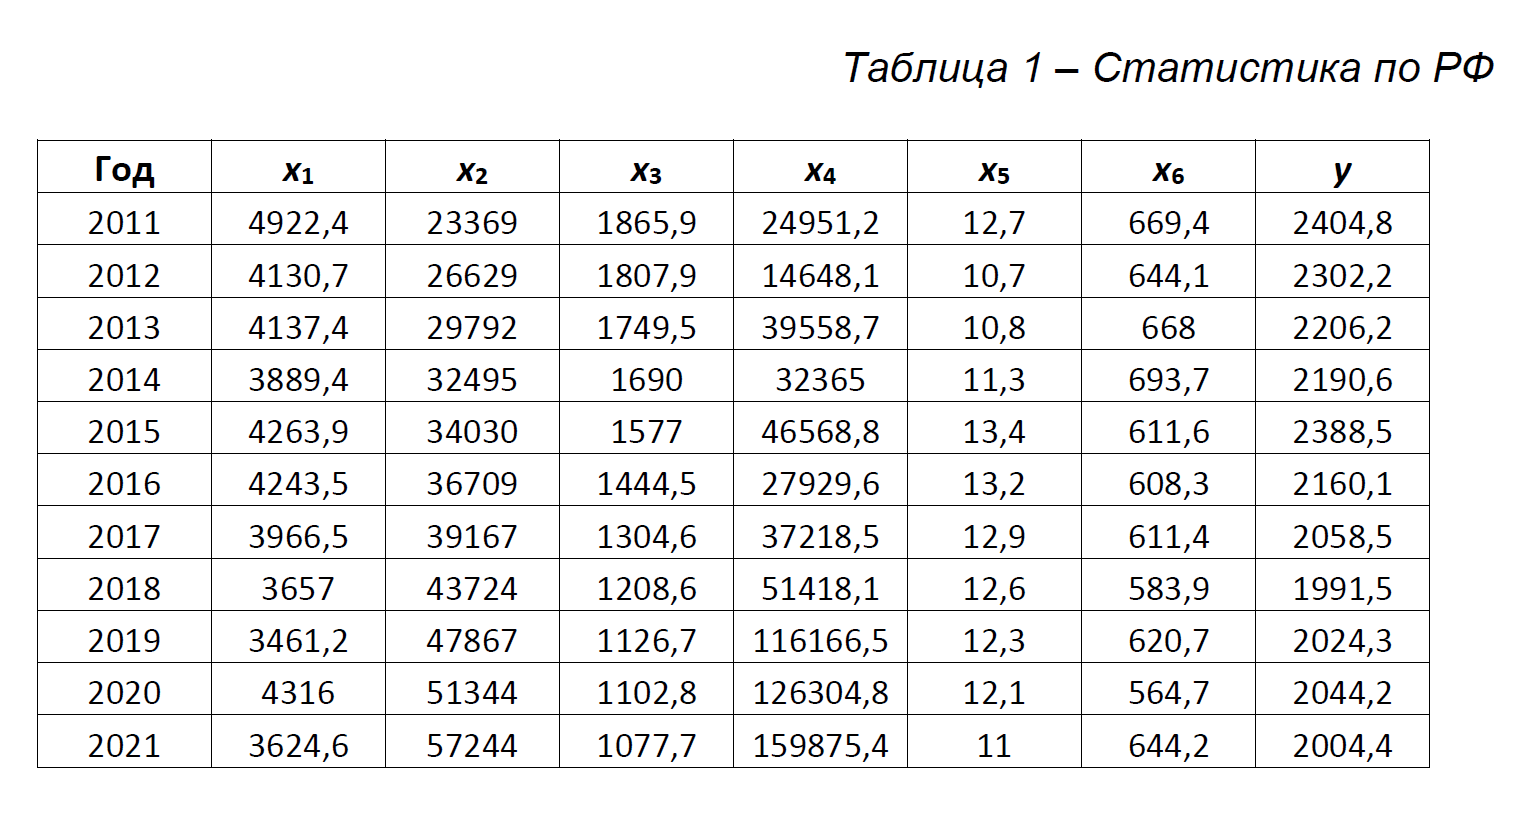

In [88]:
# Данные из таблицы
statistics = [
    [4922.4, 23369, 1865.9, 24951.2, 12.7, 669.4, 2404.8],
    [4130.7, 26629, 1807.9, 14648.1, 10.7, 644.1, 2302.2],
    [4137.4, 29792, 1749.5, 39558.7, 10.8, 668.0, 2206.2],
    [3889.4, 32495, 1690.0, 32365.0, 11.3, 693.7, 2190.6],
    [4263.9, 34030, 1577.0, 46568.8, 13.4, 611.6, 2388.5],
    [4243.5, 36709, 1444.5, 27929.6, 13.2, 608.3, 2160.1],
    [3966.5, 39167, 1304.6, 37218.5, 12.9, 611.4, 2058.5],
    [3657.0, 43724, 1208.6, 51418.1, 12.6, 583.9, 1991.5],
    [3461.2, 47867, 1126.7, 116166.5, 12.3, 620.7, 2024.3],
    [4316.0, 51344, 1102.8, 126304.8, 12.1, 564.7, 2044.2],
    [3624.6, 57244, 1077.7, 159875.4, 11.0, 644.2, 2004.4]
]

# Названия столбцов
columns = ["x1", "x2", "x3", "x4", "x5", "x6", "y"]

# Создание DataFrame
df = pd.DataFrame(statistics, columns=columns, index = np.arange(2011, 2022))

## Реализация МНК-алгоритма

In [ ]:
df['y'].std()

151.7035428363191

In [89]:
df

,x1,x2,x3,x4,x5,x6,y
2011,4922.4,23369,1865.9,24951.2,12.7,669.4,2404.8
2012,4130.7,26629,1807.9,14648.1,10.7,644.1,2302.2
2013,4137.4,29792,1749.5,39558.7,10.8,668.0,2206.2
2014,3889.4,32495,1690.0,32365.0,11.3,693.7,2190.6
2015,4263.9,34030,1577.0,46568.8,13.4,611.6,2388.5
2016,4243.5,36709,1444.5,27929.6,13.2,608.3,2160.1
2017,3966.5,39167,1304.6,37218.5,12.9,611.4,2058.5
2018,3657.0,43724,1208.6,51418.1,12.6,583.9,1991.5
2019,3461.2,47867,1126.7,116166.5,12.3,620.7,2024.3
2020,4316.0,51344,1102.8,126304.8,12.1,564.7,2044.2


Модель имеет структуру 𝑦̂ = 𝜃0 + 𝜃1𝑥1 + 𝜃2𝑥2 + 𝜃3𝑥3 + 𝜃4𝑥4 + 𝜃5𝑥5 + 𝜃6𝑥6

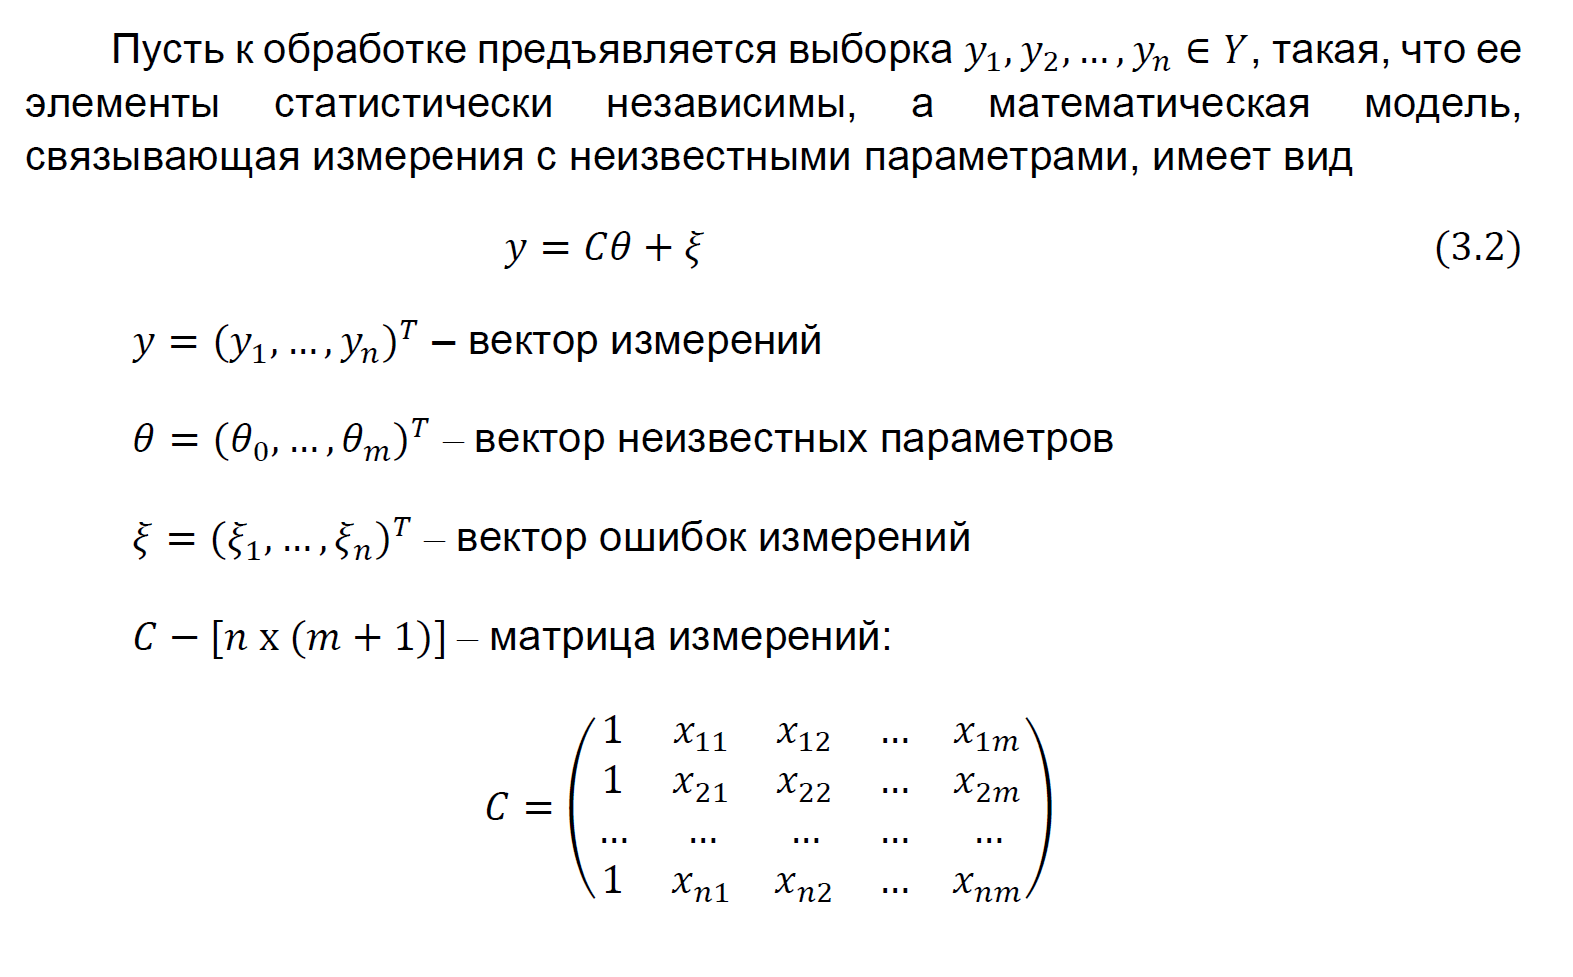

In [90]:
C = df[["x1", "x2", "x3", "x4", "x5", "x6"]]

In [91]:
C['q'] = [1]*11

In [92]:
C

,x1,x2,x3,x4,x5,x6,q
2011,4922.4,23369,1865.9,24951.2,12.7,669.4,1
2012,4130.7,26629,1807.9,14648.1,10.7,644.1,1
2013,4137.4,29792,1749.5,39558.7,10.8,668.0,1
2014,3889.4,32495,1690.0,32365.0,11.3,693.7,1
2015,4263.9,34030,1577.0,46568.8,13.4,611.6,1
2016,4243.5,36709,1444.5,27929.6,13.2,608.3,1
2017,3966.5,39167,1304.6,37218.5,12.9,611.4,1
2018,3657.0,43724,1208.6,51418.1,12.6,583.9,1
2019,3461.2,47867,1126.7,116166.5,12.3,620.7,1
2020,4316.0,51344,1102.8,126304.8,12.1,564.7,1


In [93]:
C = C.reindex(columns=['q', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']).to_numpy()
C

array([[1.000000e+00, 4.922400e+03, 2.336900e+04, 1.865900e+03,
        2.495120e+04, 1.270000e+01, 6.694000e+02],
       [1.000000e+00, 4.130700e+03, 2.662900e+04, 1.807900e+03,
        1.464810e+04, 1.070000e+01, 6.441000e+02],
       [1.000000e+00, 4.137400e+03, 2.979200e+04, 1.749500e+03,
        3.955870e+04, 1.080000e+01, 6.680000e+02],
       [1.000000e+00, 3.889400e+03, 3.249500e+04, 1.690000e+03,
        3.236500e+04, 1.130000e+01, 6.937000e+02],
       [1.000000e+00, 4.263900e+03, 3.403000e+04, 1.577000e+03,
        4.656880e+04, 1.340000e+01, 6.116000e+02],
       [1.000000e+00, 4.243500e+03, 3.670900e+04, 1.444500e+03,
        2.792960e+04, 1.320000e+01, 6.083000e+02],
       [1.000000e+00, 3.966500e+03, 3.916700e+04, 1.304600e+03,
        3.721850e+04, 1.290000e+01, 6.114000e+02],
       [1.000000e+00, 3.657000e+03, 4.372400e+04, 1.208600e+03,
        5.141810e+04, 1.260000e+01, 5.839000e+02],
       [1.000000e+00, 3.461200e+03, 4.786700e+04, 1.126700e+03,
        1.161665

In [94]:
y = df['y'].to_numpy()
y

array([2404.8, 2302.2, 2206.2, 2190.6, 2388.5, 2160.1, 2058.5, 1991.5,
       2024.3, 2044.2, 2004.4])

𝜽 ̂МНК = (𝑪^𝑻𝑪)^(−𝟏)𝑪^𝑻𝒚  

In [97]:
Q = np.round((np.linalg.inv((C.T).dot(C)).dot(C.T)).dot(y),5)
Q

array([ 6.686913e+01, -8.189000e-02,  8.720000e-03,  1.306390e+00,
        2.350000e-03,  8.638818e+01, -1.576940e+00])

In [98]:
print(f'𝑦̂ = {Q[0]} + {Q[1]}𝑥1 + {Q[2]}𝑥2 + {Q[3]}𝑥3 + {Q[4]}x4 + {Q[5]}𝑥5 + {Q[6]}𝑥6')

𝑦̂ = 66.86913 + -0.08189𝑥1 + 0.00872𝑥2 + 1.30639𝑥3 + 0.00235x4 + 86.38818𝑥5 + -1.57694𝑥6


In [99]:
def f(x1, x2, x3, x4, x5, x6):
  return Q[0] + Q[1]*𝑥1 + Q[2]*𝑥2 + Q[3]*𝑥3 + Q[4]*x4 + Q[5]*𝑥5 + Q[6]*𝑥6

## Расчёт коэффициента детерминации

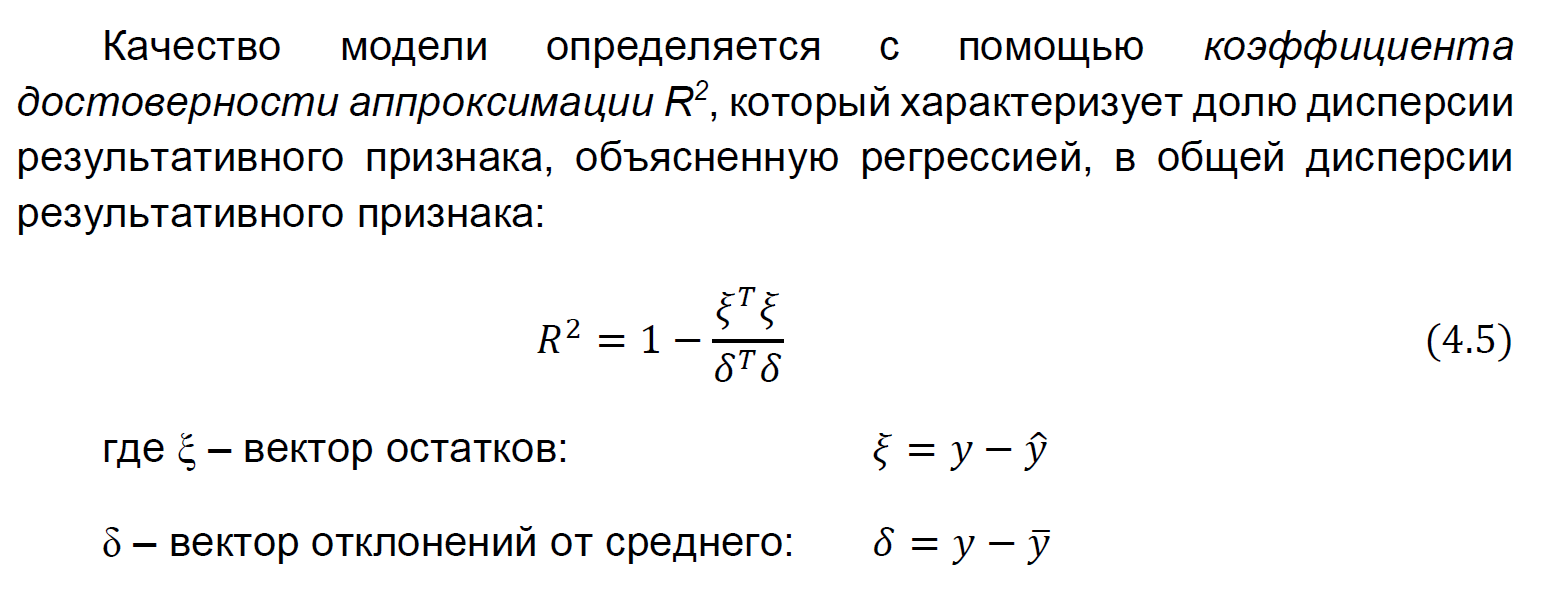

In [100]:
y_pred = []
for index, row in df.iterrows():
  y_pred.append(f(row['x1'], row['x2'], row['x3'], row['x4'], row['x5'], row['x6']))

y_pred = pd.Series(y_pred, index = np.arange(2011, 2022))
y_pred

,0
2011,2405.306145
2012,2265.702975
2013,2245.932358
2014,2197.842570
2015,2377.198777
2016,2173.257684
2017,2025.634960
2018,2016.121971
2019,2029.500546
2020,2053.453702


In [101]:
ost = (df['y'] - y_pred).to_numpy()
ost

array([ -0.506145,  36.497025, -39.732358,  -7.24257 ,  11.301223,
       -13.157684,  32.86504 , -24.621971,  -5.200546,  -9.253702,
        17.172759])

In [102]:
otkl = (df['y'] - df['y'].mean()).to_numpy()
otkl

array([ 243.40909091,  140.80909091,   44.80909091,   29.20909091,
        227.10909091,   -1.29090909, -102.89090909, -169.89090909,
       -137.09090909, -117.19090909, -156.99090909])

In [103]:
R2 = 1 - ((ost.T).dot(ost))/((otkl.T).dot(otkl))
R2

0.9767177057018924

## Параметрическая идентификация полинома 3-ей степени (как наиболее оптимального показателя аппроксимирующего многочлена)

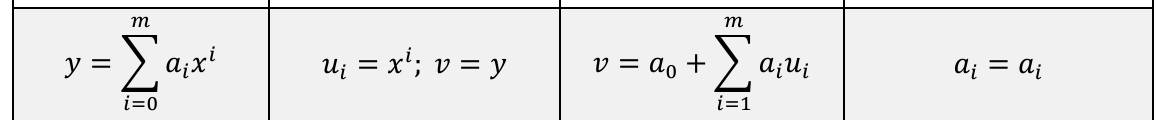

y= a0 + a1*x + a2*x^2 + a3*x^3


v = a0 + a1*u1 + a2*u2 + a3*u3

In [104]:
a = pd.DataFrame(list(stat_ryad.items()), columns = ['x', 'y'])
a['x^2'] = a['x']**2
a['x^3'] = a['x']**3
a['a0'] = [1]*58
y_gen = a['y']

In [105]:
C_1 = a.reindex(columns=['a0','x','x^2','x^3']).to_numpy()

In [107]:
A = np.round((np.linalg.inv((C_1.T).dot(C_1)).dot(C_1.T)).dot(y_gen),4)

In [108]:
print(f'𝑦 = {A[0]} + {A[1]}𝑥^1 + {A[2]}𝑥^2 + {A[3]}𝑥^3')

𝑦 = -2629.9995 + 283.6424𝑥^1 + -6.7901𝑥^2 + 0.0471𝑥^3


In [109]:
def f1(x1, x2, x3):
  return A[0] + A[1]*𝑥1 + A[2]*𝑥2 + A[3]*𝑥3

In [111]:
y_pred_ = []
for index, row in a.iterrows():
  y_pred_.append(f1(row['x'], row['x^2'], row['x^3']))

y_pred_ = pd.Series(y_pred_, index = a.index)

In [112]:
ost_ = (y_gen - y_pred_).to_numpy()
ost

array([ -0.506145,  36.497025, -39.732358,  -7.24257 ,  11.301223,
       -13.157684,  32.86504 , -24.621971,  -5.200546,  -9.253702,
        17.172759])

In [114]:
otkl_ = (y_gen - y_gen.mean()).to_numpy()

In [115]:
R2_ = 1 - ((ost_.T).dot(ost_))/((otkl_.T).dot(otkl_))
R2_

0.7347746068444593

In [119]:
x_app = np.linspace(14, 80, 100) # задаем диапазон значений x
y_app = f1(x_app,x_app**2,x_app**3) # вычисляем значения y

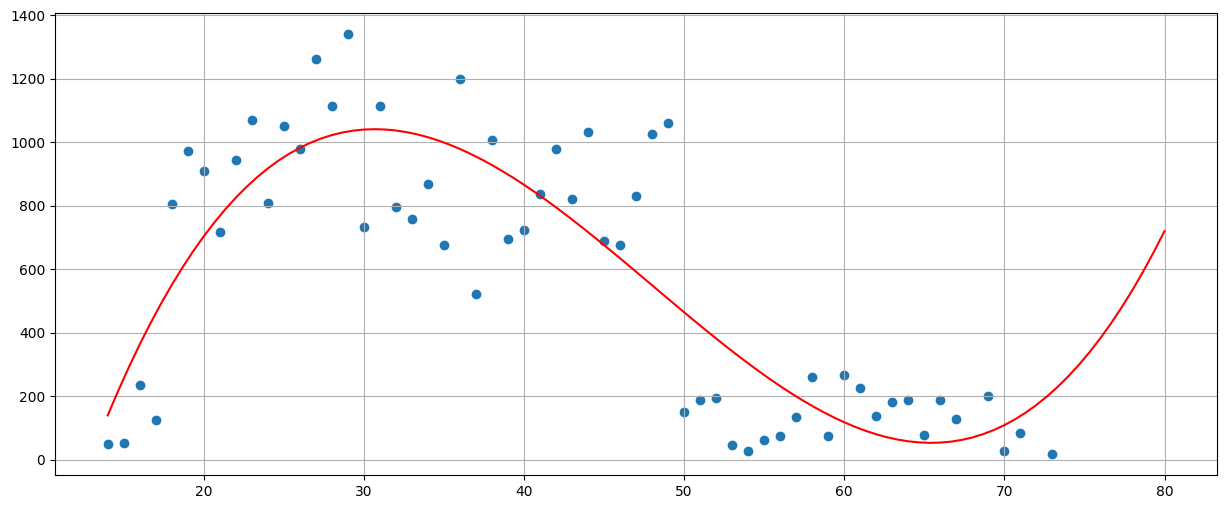

In [120]:
plt.figure(figsize=(15,6))
plt.scatter(stat_ryad.keys(), stat_ryad.values())
plt.plot(x_app, y_app, color = 'red')
plt.grid(visible=True)

plt.show()
